<a href="https://colab.research.google.com/github/santyxd3000/Undergraduate-Project/blob/main/UndergraduateProjectScript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYECTO DE GRADO**
Santiago Pardo Morales - 202013025

In [48]:
#For using the GPU
#!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
#!python rapidsai-csp-utils/colab/pip-install.py

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
import datetime
import scipy
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
import io
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn import model_selection
from sklearn.datasets import make_classification
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
#import cudf
#import cuml
#import cupy as cp
#from cuml import preprocessing as cpp
import tensorflow as tf
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
physical_devices = tf.config.list_physical_devices('GPU')

In [50]:
print("GPU:", tf.config.list_physical_devices('GPU'))
print("Num GPUs:", len(physical_devices))

GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs: 1


In [51]:
#Visual Studio / GitHub
'''
filtered_data = pd.read_csv('filtered_data.csv',sep=';').dropna()
normal_operation_data = pd.read_csv('normal_operation_data.csv',sep=';').dropna()
anomaly_data = pd.read_csv('anomaly_data.csv',sep=';').dropna()
'''

"\nfiltered_data = pd.read_csv('filtered_data.csv',sep=';').dropna()\nnormal_operation_data = pd.read_csv('normal_operation_data.csv',sep=';').dropna()\nanomaly_data = pd.read_csv('anomaly_data.csv',sep=';').dropna()\n"

In [52]:
#Google Colab

#from google.colab import files
#uploaded = files.upload()


In [53]:
#Google Colab

filtered_data = pd.read_csv('filtered_data.csv',sep=';').dropna()
normal_operation_data = pd.read_csv('normal_operation_data.csv',sep=';').dropna()
anomaly_data = pd.read_csv('anomaly_data.csv',sep=';').dropna()


**ANÁLISIS DE LOS DATOS**

*Datos conjuntos*

Text(0, 0.5, 'Frequency')

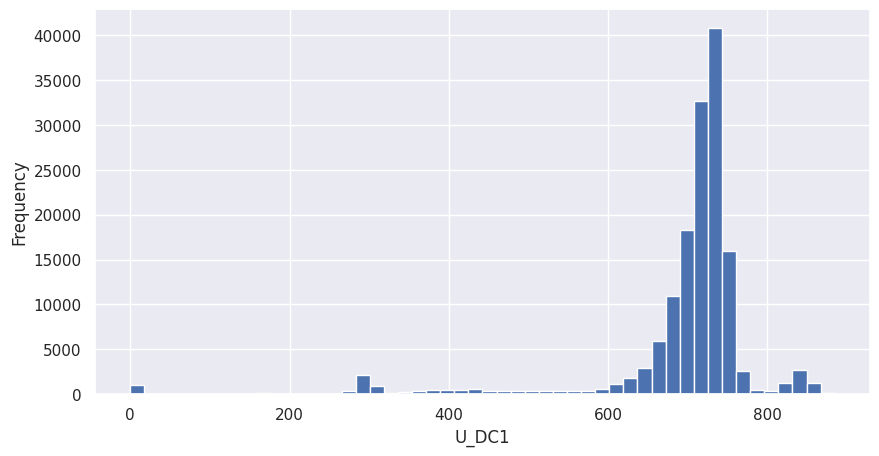

In [54]:
plt.figure(figsize=(10,5))
plt.hist(filtered_data["U_DC1"],bins=50)
plt.xlabel('U_DC1')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

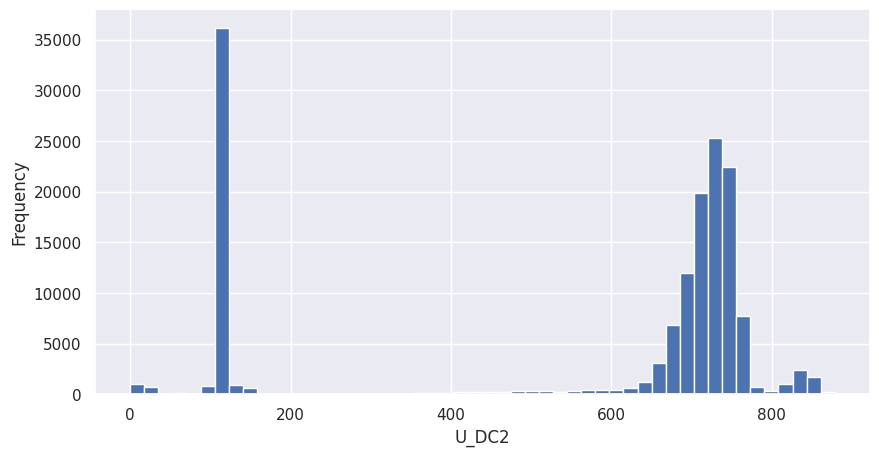

In [55]:
plt.figure(figsize=(10,5))
plt.hist(filtered_data["U_DC2"],bins=50)
plt.xlabel('U_DC2')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

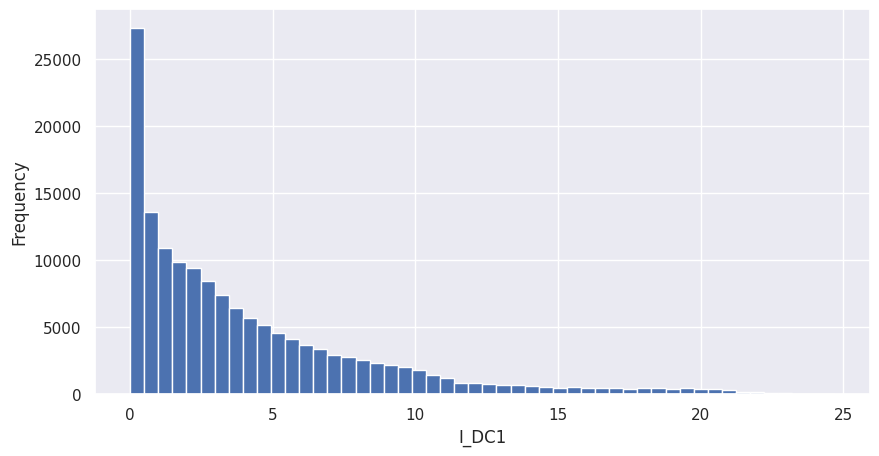

In [56]:
plt.figure(figsize=(10,5))
plt.hist(filtered_data["I_DC1"],bins=50)
plt.xlabel('I_DC1')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

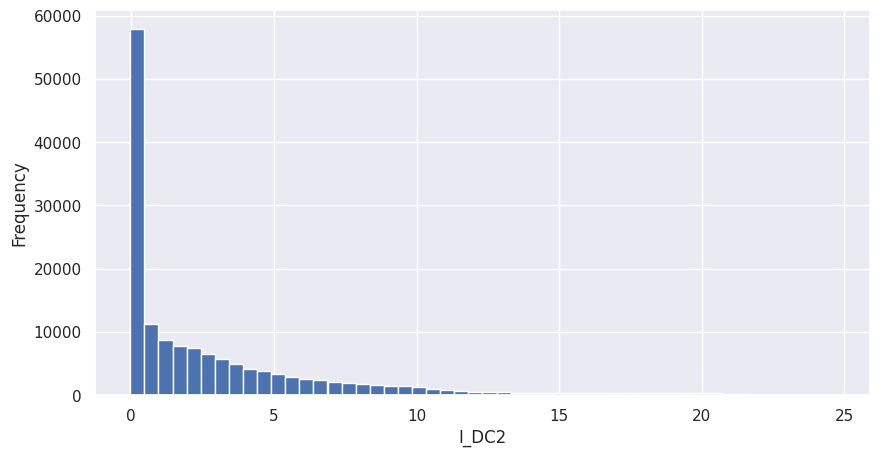

In [57]:
plt.figure(figsize=(10,5))
plt.hist(filtered_data["I_DC2"],bins=50)
plt.xlabel('I_DC2')
plt.ylabel('Frequency')

*Datos de "entrenamiento"*

Text(0, 0.5, 'Frequency')

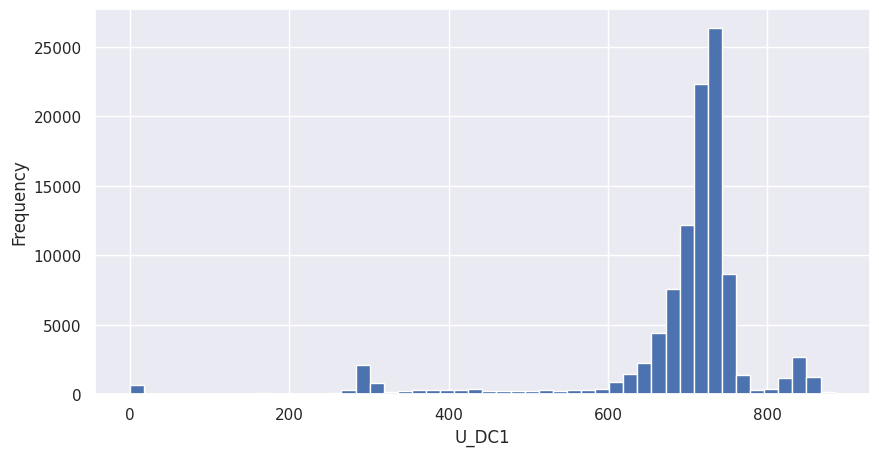

In [58]:
plt.figure(figsize=(10,5))
plt.hist(normal_operation_data["U_DC1"],bins=50)
plt.xlabel('U_DC1')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

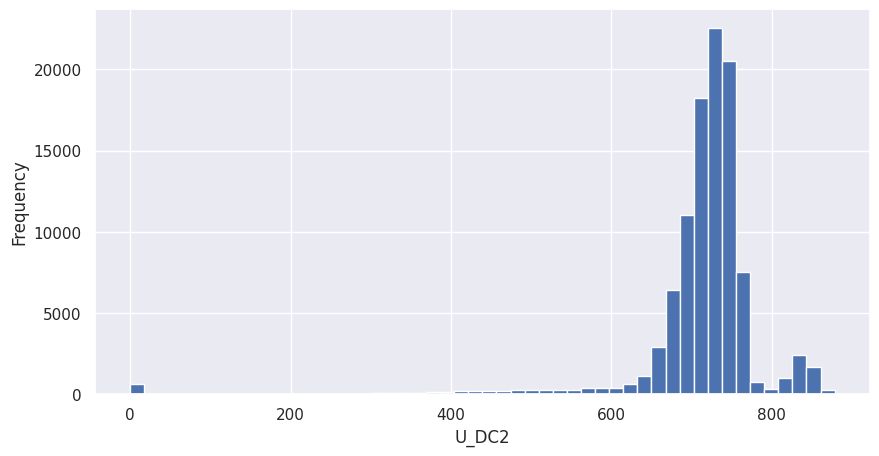

In [59]:
plt.figure(figsize=(10,5))
plt.hist(normal_operation_data["U_DC2"],bins=50)
plt.xlabel('U_DC2')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

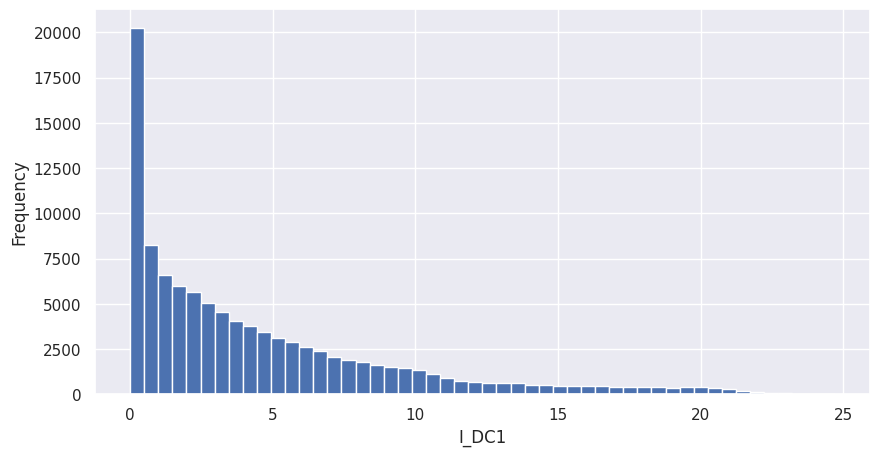

In [60]:
plt.figure(figsize=(10,5))
plt.hist(normal_operation_data["I_DC1"],bins=50)
plt.xlabel('I_DC1')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

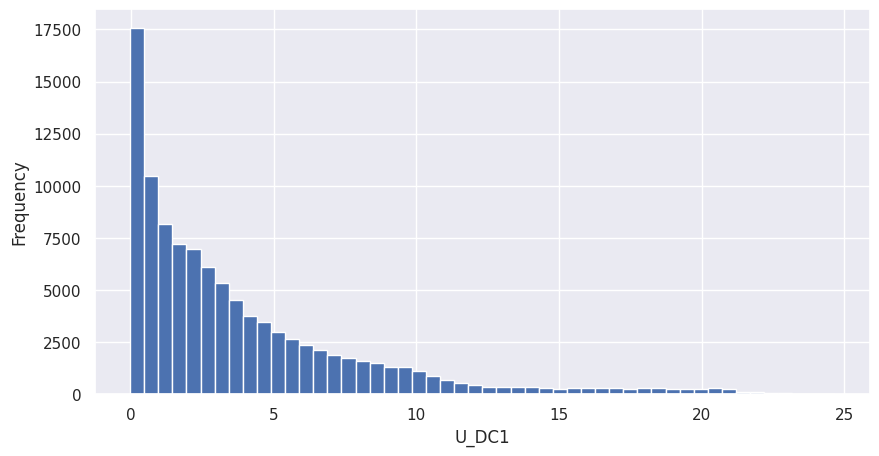

In [61]:
plt.figure(figsize=(10,5))
plt.hist(normal_operation_data["I_DC2"],bins=50)
plt.xlabel('U_DC1')
plt.ylabel('Frequency')

## **MÉTODO ESTADÍSTICO -  RANGO INTERCUARTIL**

### *Datos de entrenamiento*

In [62]:
statistical_df_train = normal_operation_data
statistical_df_test = anomaly_data
statistical_df_train.Timestamp = pd.to_datetime(statistical_df_train.Timestamp, format='%Y-%m-%d %H:%M:%S')
statistical_df_train["Time"] = statistical_df_train.Timestamp.dt.time
statistical_df_test.Timestamp = pd.to_datetime(statistical_df_test.Timestamp, format='%Y-%m-%d %H:%M:%S')
statistical_df_test["Time"] = statistical_df_test.Timestamp.dt.time

Text(0, 0.5, 'Current of the system')

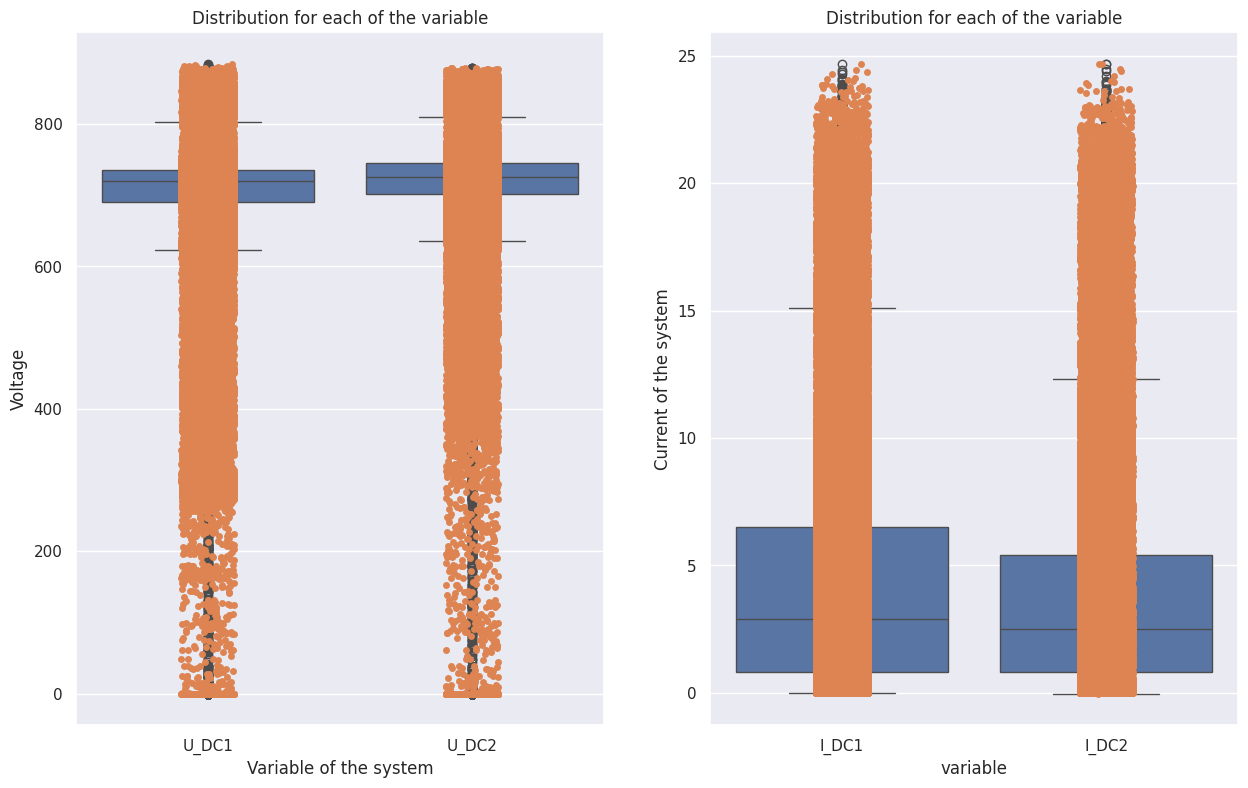

In [63]:
a = statistical_df_train[["U_DC1","U_DC2"]].melt()
b = statistical_df_train[["I_DC1","I_DC2"]].melt()
fig, axes = plt.subplots(1,2,figsize=(15,9))
sns.boxplot(x="variable",y="value",data=a,ax=axes[0])
sns.stripplot(data = a, x= "variable",y="value",ax=axes[0])
axes[0].set_title("Distribution for each of the variable")
axes[0].set_xlabel("Variable of the system")
axes[0].set_ylabel("Voltage")

sns.boxplot(x="variable",y="value",data=b,ax=axes[1])
sns.stripplot(data = b, x= "variable",y="value",ax=axes[1])
plt.title("Distribution for each of the variable")
plt.ylabel("Current of the system")

In [64]:
q1_group = statistical_df_train.groupby('Time')[['U_DC1','U_DC2','I_DC1','I_DC2']].agg(lambda x: x.quantile(0.25)).reset_index()
q3_group = statistical_df_train.groupby('Time')[['U_DC1','U_DC2','I_DC1','I_DC2']].agg(lambda x: x.quantile(0.75)).reset_index()

In [65]:
time = np.array(q1_group['Time'])

In [66]:
q1_group1 = q1_group[['U_DC1','U_DC2','I_DC1','I_DC2']]
q3_group1 = q3_group[['U_DC1','U_DC2','I_DC1','I_DC2']]

iqr_group1 = q3_group1-q1_group1
iqr_group = iqr_group1
iqr_group['Time'] = time
iqr_group1 = iqr_group1.drop('Time',axis=1)

In [67]:
lower_iqr = q1_group1 - 3*iqr_group1
upper_iqr = q3_group1 + 3*iqr_group1

In [68]:
iqr_values = pd.DataFrame()
iqr_values['Upper_UDC1'] = upper_iqr[['U_DC1']]
iqr_values['Upper_UDC2'] = upper_iqr[['U_DC2']]
iqr_values['Upper_IDC1'] = upper_iqr[['I_DC1']]
iqr_values['Upper_IDC2'] = upper_iqr[['I_DC2']]
iqr_values['Lower_UDC1'] = lower_iqr[['U_DC1']]
iqr_values['Lower_UDC2'] = lower_iqr[['U_DC2']]
iqr_values['Lower_IDC1'] = lower_iqr[['I_DC1']]
iqr_values['Lower_IDC2'] = lower_iqr[['I_DC2']]
iqr_values['Time'] = time

In [69]:
merged_df_train = pd.merge(statistical_df_train, iqr_values, how="inner", on=["Time"])

In [70]:
merged_df_train['Anomaly_UDC1'] = np.where((merged_df_train['U_DC1'] < merged_df_train['Lower_UDC1']) | (merged_df_train['U_DC1'] > merged_df_train['Upper_UDC1']), 1,0)
merged_df_train['Anomaly_UDC2'] = np.where((merged_df_train['U_DC2'] < merged_df_train['Lower_UDC2']) | (merged_df_train['U_DC2'] > merged_df_train['Upper_UDC2']), 1,0)
merged_df_train['Anomaly_IDC1'] = np.where((merged_df_train['I_DC1'] < merged_df_train['Lower_IDC1']) | (merged_df_train['I_DC1'] > merged_df_train['Upper_IDC1']), 1,0)
merged_df_train['Anomaly_IDC2'] = np.where((merged_df_train['I_DC2'] < merged_df_train['Lower_IDC2']) | (merged_df_train['I_DC2'] > merged_df_train['Upper_IDC2']), 1,0)
merged_df_train['Anomaly_String1'] = np.where((merged_df_train['Anomaly_UDC1'] == 1) | (merged_df_train['Anomaly_IDC1'] == 1), 1,0)
merged_df_train['Anomaly_String2'] = np.where((merged_df_train['Anomaly_UDC2'] == 1) | (merged_df_train['Anomaly_IDC2'] == 1), 1,0)
merged_df_train.loc[:,'Anomaly'] = np.where(
    (merged_df_train['Anomaly_String1'] == 1) |
    (merged_df_train['Anomaly_String2'] == 1),
    1,
    0
)
merged_df_train = merged_df_train.sort_values(by=['Timestamp'])

In [71]:
count0 = (merged_df_train['Anomaly'] == 0).sum()
count1 = (merged_df_train['Anomaly'] == 1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

93306 8930


In [72]:
anomaly_iqr_train = merged_df_train[merged_df_train['Anomaly'] == 1]
no_anomaly_iqr_train = merged_df_train[merged_df_train['Anomaly'] == 0]

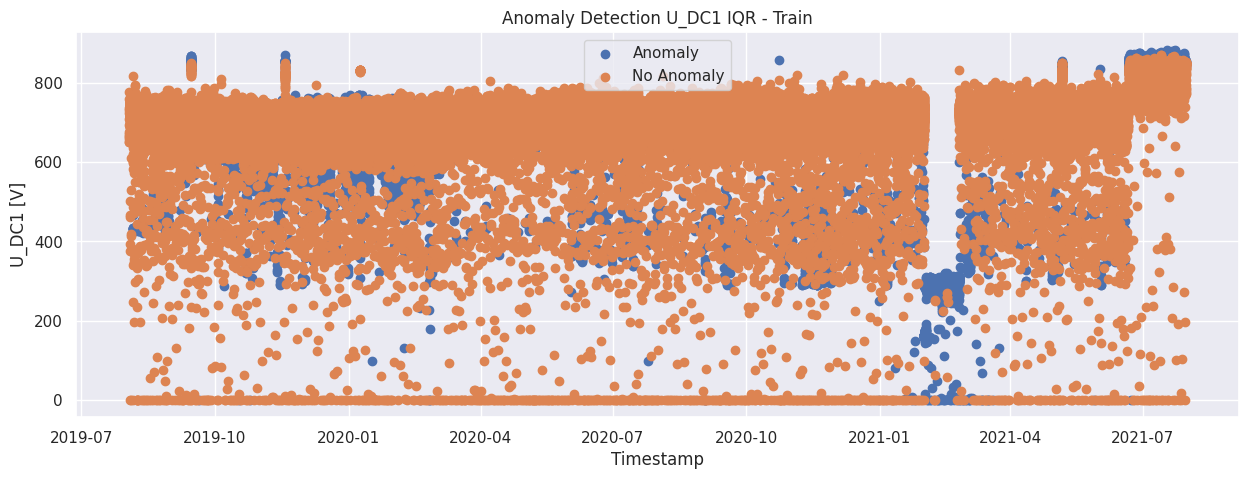

In [73]:
plt.figure(figsize=(15, 5))
plt.scatter(anomaly_iqr_train['Timestamp'],anomaly_iqr_train['U_DC1'])
plt.scatter(no_anomaly_iqr_train['Timestamp'],no_anomaly_iqr_train['U_DC1'])
plt.xlabel('Timestamp')
plt.ylabel('U_DC1 [V]')
plt.title('Anomaly Detection U_DC1 IQR - Train')
plt.legend(['Anomaly','No Anomaly'])

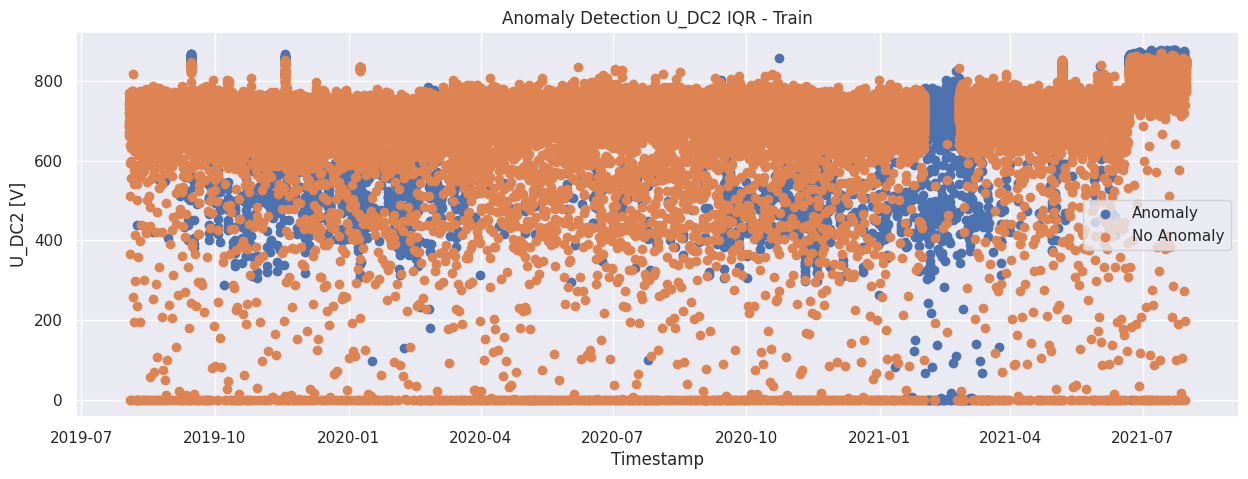

In [74]:
plt.figure(figsize=(15, 5))
plt.scatter(anomaly_iqr_train['Timestamp'],anomaly_iqr_train['U_DC2'])
plt.scatter(no_anomaly_iqr_train['Timestamp'],no_anomaly_iqr_train['U_DC2'])
plt.xlabel('Timestamp')
plt.ylabel('U_DC2 [V]')
plt.title('Anomaly Detection U_DC2 IQR - Train')
plt.legend(['Anomaly','No Anomaly'])

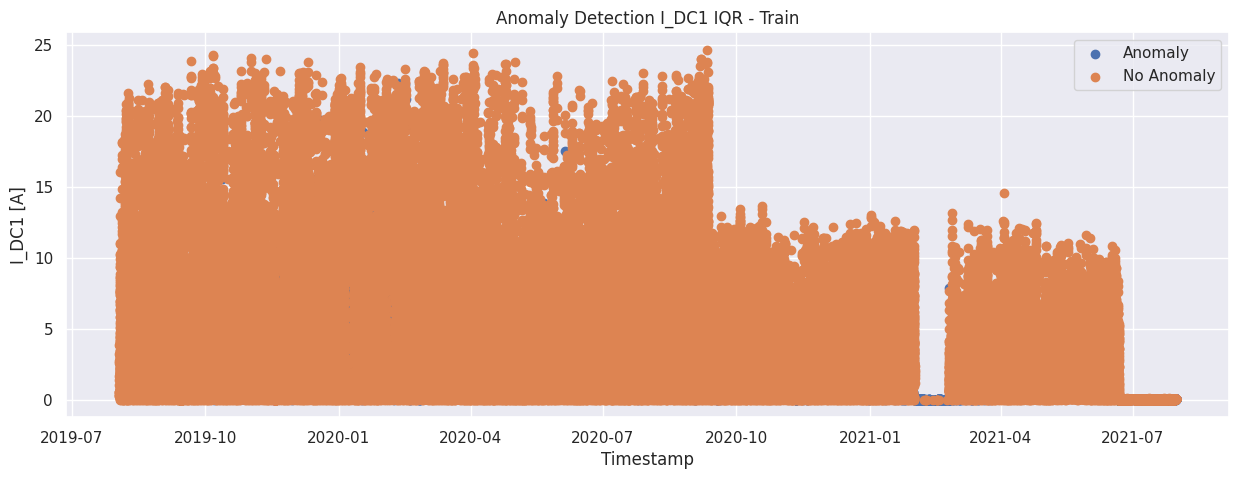

In [75]:
plt.figure(figsize=(15, 5))
plt.scatter(anomaly_iqr_train['Timestamp'],anomaly_iqr_train['I_DC1'])
plt.scatter(no_anomaly_iqr_train['Timestamp'],no_anomaly_iqr_train['I_DC1'])
plt.xlabel('Timestamp')
plt.ylabel('I_DC1 [A]')
plt.title('Anomaly Detection I_DC1 IQR - Train')
plt.legend(['Anomaly','No Anomaly'])

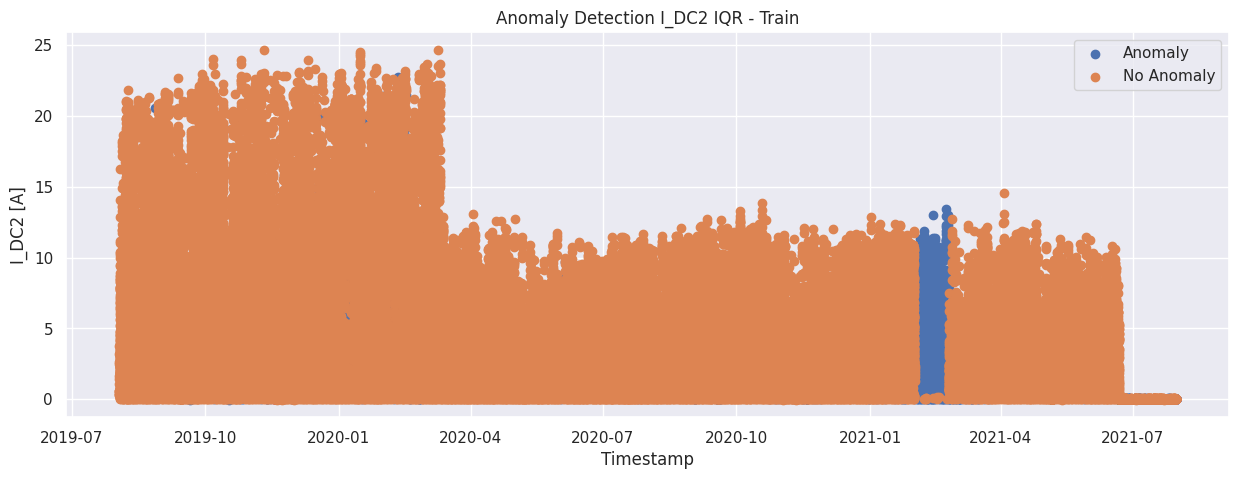

In [76]:
plt.figure(figsize=(15, 5))
plt.scatter(anomaly_iqr_train['Timestamp'],anomaly_iqr_train['I_DC2'])
plt.scatter(no_anomaly_iqr_train['Timestamp'],no_anomaly_iqr_train['I_DC2'])
plt.xlabel('Timestamp')
plt.ylabel('I_DC2 [A]')
plt.title('Anomaly Detection I_DC2 IQR - Train')
plt.legend(['Anomaly','No Anomaly'])

In [77]:
merged_df_train

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Time,Upper_UDC1,Upper_UDC2,Upper_IDC1,Upper_IDC2,...,Lower_UDC2,Lower_IDC1,Lower_IDC2,Anomaly_UDC1,Anomaly_UDC2,Anomaly_IDC1,Anomaly_IDC2,Anomaly_String1,Anomaly_String2,Anomaly
0,2019-08-02 16:25:00,777.010,768.710,2.700,2.607,16:25:00,923.7590,886.0335,8.4615,5.5035,...,544.7240,-5.3775,-3.0575,0,0,0,0,0,0,0
1,2019-08-02 16:30:00,761.130,745.964,3.862,3.748,16:30:00,894.4745,880.3615,7.7855,5.1540,...,549.4995,-4.8810,-2.8470,0,0,0,0,0,0,0
2,2019-08-02 16:35:00,736.754,742.908,3.228,3.192,16:35:00,901.4545,886.9950,7.6950,4.9345,...,542.3745,-4.9155,-2.7480,0,0,0,0,0,0,0
3,2019-08-02 16:40:00,731.928,732.224,2.568,2.484,16:40:00,897.8275,876.7320,6.6050,4.4035,...,549.6115,-4.1400,-2.3725,0,0,0,0,0,0,0
4,2019-08-02 16:45:00,723.546,720.698,1.654,1.640,16:45:00,884.6805,877.0080,5.9200,4.2875,...,552.2990,-3.6700,-2.3520,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102231,2021-07-30 17:10:00,788.168,788.084,0.020,0.050,17:10:00,879.9830,853.7770,3.5355,2.5220,...,545.4655,-2.1940,-1.3560,0,0,0,0,0,0,0
102232,2021-07-30 17:15:00,780.194,780.138,0.020,0.050,17:15:00,876.8885,844.2770,3.0220,2.2355,...,547.4665,-1.8710,-1.2050,0,0,0,0,0,0,0
102233,2021-07-30 17:20:00,772.618,772.588,0.020,0.050,17:20:00,885.7275,837.7750,2.5680,1.8875,...,544.8880,-1.5795,-1.0035,0,0,0,0,0,0,0
102234,2021-07-30 17:25:00,775.204,775.162,0.020,0.050,17:25:00,890.7275,837.6390,2.2820,1.6360,...,535.2110,-1.4315,-0.8630,0,0,0,0,0,0,0


### *Datos de prueba*

In [78]:
#Agrupar con datos de prueba
merged_df_test = pd.merge(anomaly_data, iqr_values, how="inner", on=["Time"])

In [79]:
merged_df_test['Anomaly_UDC1'] = np.where((merged_df_test['U_DC1'] < merged_df_test['Lower_UDC1']) | (merged_df_test['U_DC1'] > merged_df_test['Upper_UDC1']), 1,0)
merged_df_test['Anomaly_UDC2'] = np.where((merged_df_test['U_DC2'] < merged_df_test['Lower_UDC2']) | (merged_df_test['U_DC2'] > merged_df_test['Upper_UDC2']), 1,0)
merged_df_test['Anomaly_IDC1'] = np.where((merged_df_test['I_DC1'] < merged_df_test['Lower_IDC1']) | (merged_df_test['I_DC1'] > merged_df_test['Upper_IDC1']), 1,0)
merged_df_test['Anomaly_IDC2'] = np.where((merged_df_test['I_DC2'] < merged_df_test['Lower_IDC2']) | (merged_df_test['I_DC2'] > merged_df_test['Upper_IDC2']), 1,0)

merged_df_test['Anomaly_String1'] = np.where((merged_df_test['Anomaly_UDC1'] == 1) | (merged_df_test['Anomaly_IDC1'] == 1), 1,0)
merged_df_test['Anomaly_String2'] = np.where((merged_df_test['Anomaly_UDC2'] == 1) | (merged_df_test['Anomaly_IDC2'] == 1), 1,0)

merged_df_test.loc[:,'Anomaly'] = np.where(
    (merged_df_test['Anomaly_String1'] == 1) |
    (merged_df_test['Anomaly_String2'] == 1),
    1,
    0
)

merged_df_test = merged_df_test.sort_values(by=['Timestamp'])

In [80]:
count0 = (merged_df_test['Anomaly'] == 0).sum()
count1 = (merged_df_test['Anomaly'] == 1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

9195 38967


In [81]:
anomaly_iqr_test = merged_df_test[merged_df_test['Anomaly'] == 1]
no_anomaly_iqr_test = merged_df_test[merged_df_test['Anomaly'] == 0]

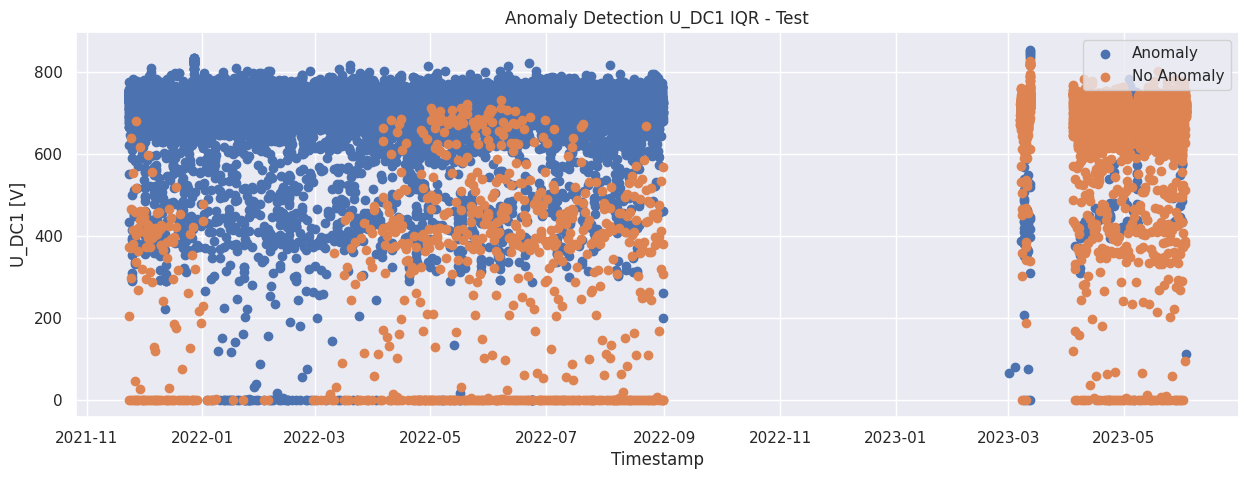

In [82]:
plt.figure(figsize=(15, 5))
plt.scatter(anomaly_iqr_test['Timestamp'],anomaly_iqr_test['U_DC1'])
plt.scatter(no_anomaly_iqr_test['Timestamp'],no_anomaly_iqr_test['U_DC1'])
plt.xlabel('Timestamp')
plt.ylabel('U_DC1 [V]')
plt.title('Anomaly Detection U_DC1 IQR - Test')
plt.legend(['Anomaly','No Anomaly'])

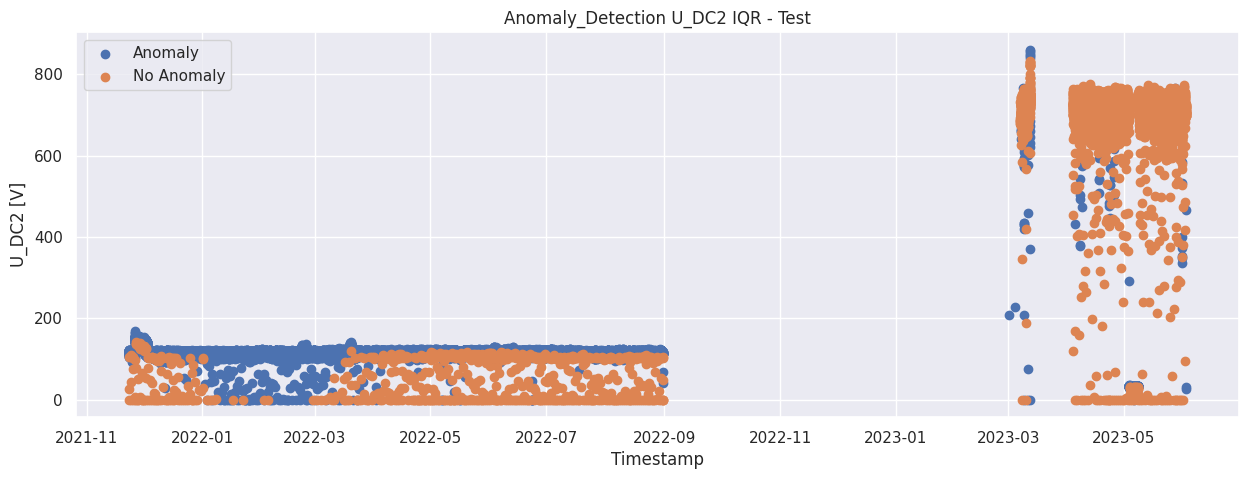

In [83]:
plt.figure(figsize=(15, 5))
plt.scatter(anomaly_iqr_test['Timestamp'],anomaly_iqr_test['U_DC2'])
plt.scatter(no_anomaly_iqr_test['Timestamp'],no_anomaly_iqr_test['U_DC2'])
plt.xlabel('Timestamp')
plt.ylabel('U_DC2 [V]')
plt.title('Anomaly_Detection U_DC2 IQR - Test')
plt.legend(['Anomaly','No Anomaly'])

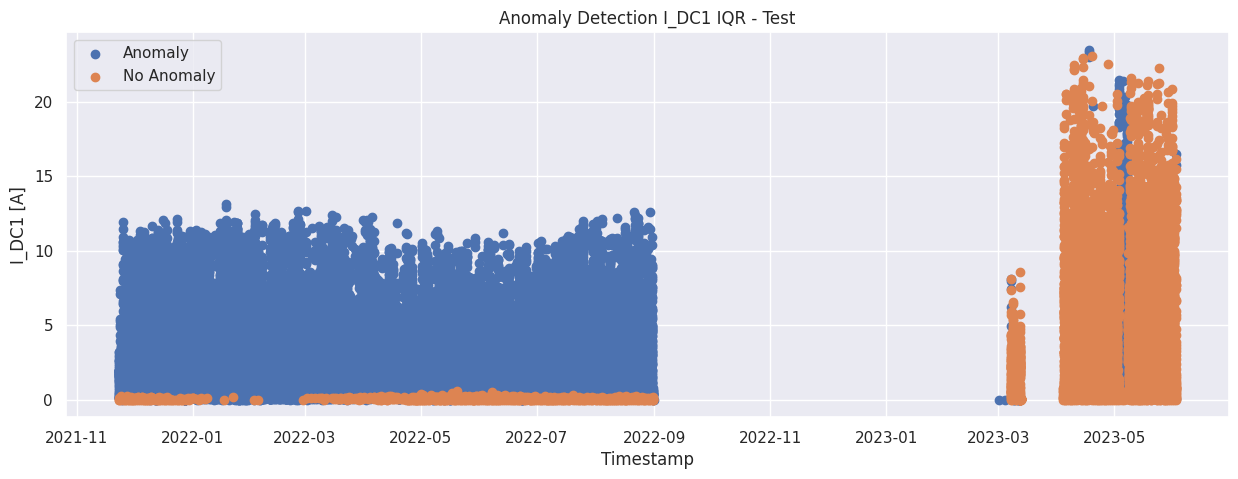

In [84]:
plt.figure(figsize=(15, 5))
plt.scatter(anomaly_iqr_test['Timestamp'],anomaly_iqr_test['I_DC1'])
plt.scatter(no_anomaly_iqr_test['Timestamp'],no_anomaly_iqr_test['I_DC1'])
plt.xlabel('Timestamp')
plt.ylabel('I_DC1 [A]')
plt.title('Anomaly Detection I_DC1 IQR - Test')
plt.legend(['Anomaly','No Anomaly'])

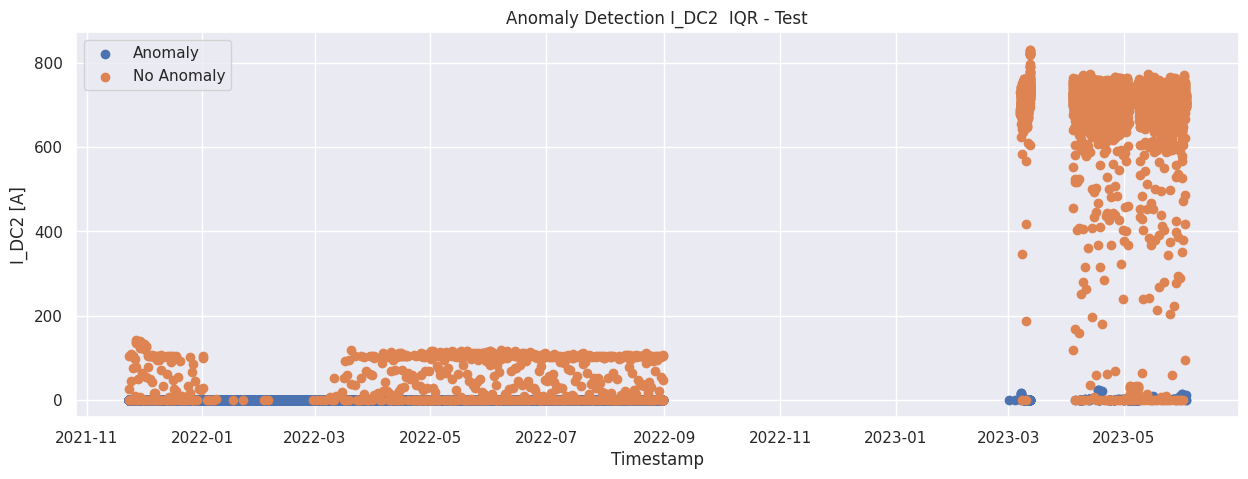

In [85]:
plt.figure(figsize=(15, 5))
plt.scatter(anomaly_iqr_test['Timestamp'],anomaly_iqr_test['I_DC2'])
plt.scatter(no_anomaly_iqr_test['Timestamp'],no_anomaly_iqr_test['U_DC2'])
plt.xlabel('Timestamp')
plt.ylabel('I_DC2 [A]')
plt.title('Anomaly Detection I_DC2  IQR - Test')
plt.legend(['Anomaly','No Anomaly'])

In [86]:
statistical_anomaly_df = pd.concat([merged_df_train,merged_df_test])
statistical_anomaly_df = statistical_anomaly_df[['Timestamp','U_DC1','U_DC2','I_DC1','I_DC2','Anomaly']]

In [87]:
#statistical_anomaly_df.to_csv('statistical_df_with_anomalies.csv', sep=';', index=False, encoding='utf-8')

## **MÉTODOS DE MACHINE LEARNING PARA DETECCIÓN DE ANOMALÍAS**



No supervisado

In [88]:
scaler = StandardScaler()

### *Método Isolation Forest*

In [89]:
df_if = filtered_data

time = df_if[['Timestamp']]
rows_if = df_if[['U_DC1','U_DC2','I_DC1','I_DC2']]

df_train_if = df_if[(df_if['Timestamp'] < '2021-09-03')]
df_test_if = df_if[(df_if['Timestamp'] >= '2021-09-03')]

scaled_df_if = scaler.fit_transform(rows_if)

x_train_if = scaled_df_if[0:102236]
x_test_if = scaled_df_if[102236:150398]

y_train_if = np.array(merged_df_train['Anomaly'])
y_train_if[y_train_if == 1] = -1
y_train_if[y_train_if == 0] = 1

y_test_if = np.array(merged_df_test['Anomaly'])
y_test_if[y_test_if == 1] = -1
y_test_if[y_test_if == 0] = 1

#### Datos de entrenamiento

In [90]:
"""
from sklearn.metrics import accuracy_score, make_scorer, precision_score, recall_score, f1_score

isolation_forest = IsolationForest(random_state=42)

scoring_if = {"Accuracy": make_scorer(accuracy_score),
              "Precision": make_scorer(precision_score),
              "Recall": make_scorer(recall_score),
              "F1-Score": make_scorer(f1_score)}

param_grid_if = {'n_estimators': np.array((range(100, 800, 50))),
              'bootstrap': np.array([True, False]),
              'max_features': np.array([1,2,3,4])}

grid_dt_estimator_if = model_selection.GridSearchCV(isolation_forest,
                                                 param_grid_if,
                                                 scoring=scoring_if,
                                                 refit='Accuracy',
                                                 cv=5,
                                                 return_train_score=True)

grid_dt_estimator_if.fit(x_train_if, y_train_if)



print("Best parameters found:")
print(grid_dt_estimator_if.best_params_)
"""
#Best Parameters
#bootstrap: False
#n_estimators = 150
#contamination = 'auto'
#max_samples= 'auto'
#max_features=2

'\nfrom sklearn.metrics import accuracy_score, make_scorer, precision_score, recall_score, f1_score\n\nisolation_forest = IsolationForest(random_state=42)\n\nscoring_if = {"Accuracy": make_scorer(accuracy_score),\n              "Precision": make_scorer(precision_score),\n              "Recall": make_scorer(recall_score),\n              "F1-Score": make_scorer(f1_score)}\n\nparam_grid_if = {\'n_estimators\': np.array((range(100, 800, 50))),\n              \'bootstrap\': np.array([True, False]),\n              \'max_features\': np.array([1,2,3,4])}\n\ngrid_dt_estimator_if = model_selection.GridSearchCV(isolation_forest,\n                                                 param_grid_if,\n                                                 scoring=scoring_if,\n                                                 refit=\'Accuracy\',\n                                                 cv=5,\n                                                 return_train_score=True)\n\ngrid_dt_estimator_if.fit(x_train_if

In [91]:
best_if_model = IsolationForest(random_state=42, bootstrap=False, n_estimators=150, contamination='auto',max_samples='auto',max_features=2)
#Train model
best_if_model.fit(x_train_if)
pred_if_model_train = np.array(best_if_model.predict(x_train_if))
df_train_if['Anomaly'] = pred_if_model_train

<ipython-input-91-3017a08d5125>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_if['Anomaly'] = pred_if_model_train


In [92]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

accuracy = accuracy_score(pred_if_model_train,y_train_if)
precision = precision_score(pred_if_model_train,y_train_if)
f1_score = f1_score(pred_if_model_train,y_train_if)
recall = recall_score(pred_if_model_train,y_train_if)

print("Precision: "+ str(precision))
print("Accuracy: "+ str(accuracy))
print("F1_Score: "+ str(f1_score))
print("Recall: "+ str(recall))

Precision: 0.8770711422630914
Accuracy: 0.859775421573614
F1_Score: 0.9194642937396073
Recall: 0.9661637269485962


In [93]:
def compute_tp_tn_fn_fp(y_act, y_pred):
    tp = sum((y_act == -1) & (y_pred == -1))
    tn = sum((y_act == 1) & (y_pred == 1))
    fn = sum((y_act == -1) & (y_pred == 1))
    fp = sum((y_act == 1) & (y_pred == -1))
    return tp, tn, fp, fn

tp,tn,fn,fp = compute_tp_tn_fn_fp(y_train_if,pred_if_model_train)
print("Number of TP: "+str(tp))
print("Number of TN: "+str(tn))
print("Number of FP: "+str(fp))
print("Number of FN: "+str(fn))

Number of TP: 6064
Number of TN: 81836
Number of FP: 2866
Number of FN: 11470


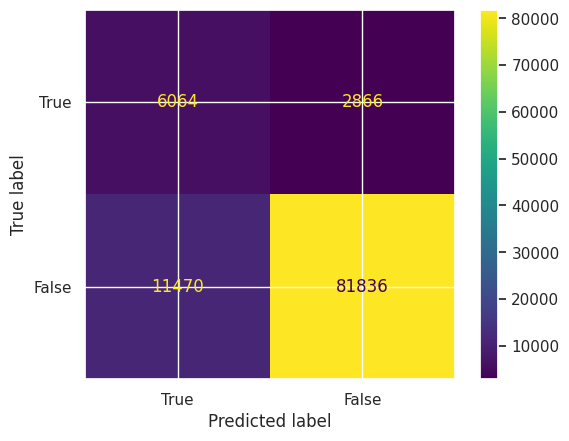

In [94]:
cm_train = confusion_matrix(y_train_if,pred_if_model_train)
cm_train_display = ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = [True,False])
cm_train_display.plot()
plt.show()

In [95]:
count0 = (df_train_if['Anomaly'] == 1).sum()
count1 = (df_train_if['Anomaly'] == -1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

84702 17534


In [96]:
anomaly_if_train = df_train_if[df_train_if['Anomaly'] == -1]
no_anomaly_if_train = df_train_if[df_train_if['Anomaly'] == 1]

In [97]:
#Coincidencias con modelo estadístico
print(anomaly_iqr_train['Timestamp'].isin(anomaly_if_train['Timestamp']).sum())

6064


<ipython-input-97-3e70a979fe04>:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  print(anomaly_iqr_train['Timestamp'].isin(anomaly_if_train['Timestamp']).sum())


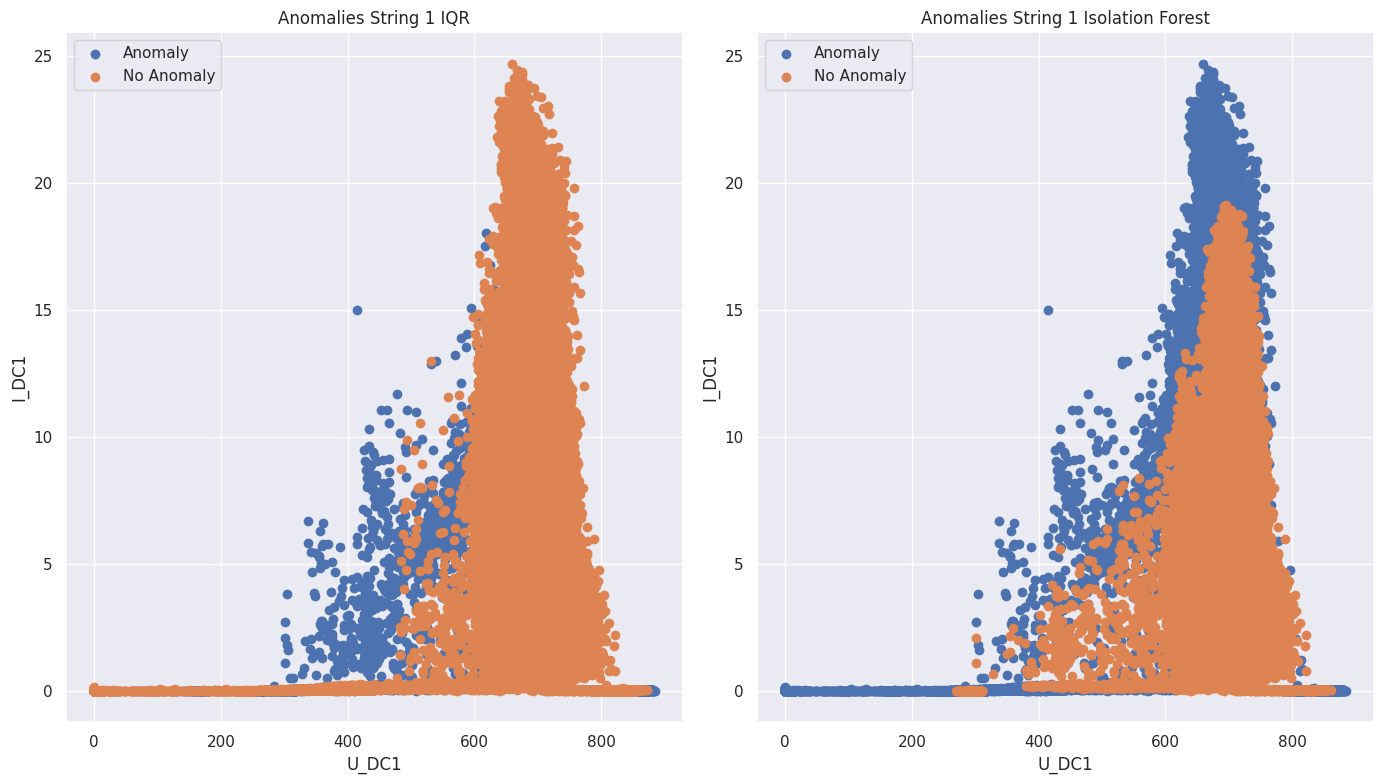

In [98]:
#STRING1

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_train['U_DC1'], anomaly_iqr_train['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_iqr_train['U_DC1'], no_anomaly_iqr_train['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_if_train['U_DC1'], anomaly_if_train['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_if_train['U_DC1'], no_anomaly_if_train['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 Isolation Forest')


# Ajustes de diseño
plt.tight_layout()
plt.show()

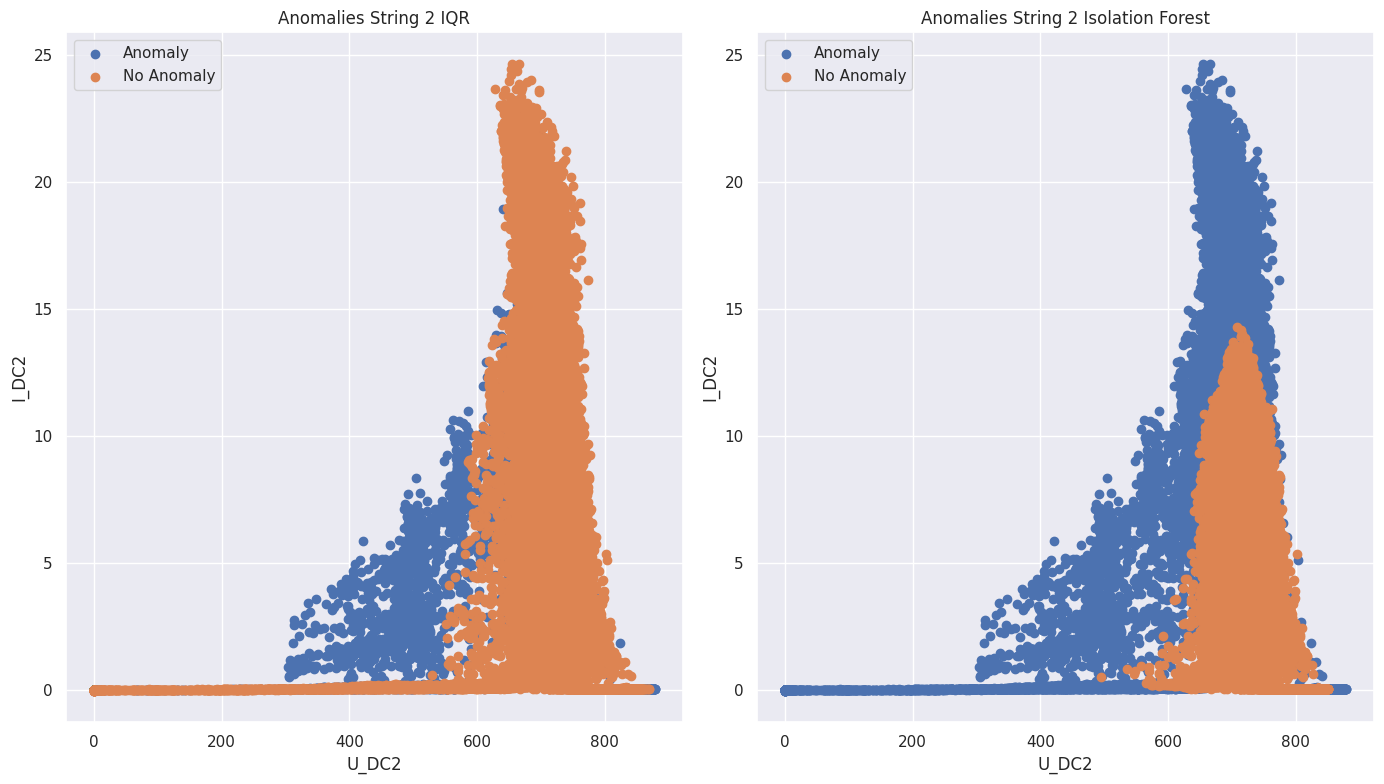

In [99]:
#STRING2

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_train['U_DC2'], anomaly_iqr_train['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_iqr_train['U_DC2'], no_anomaly_iqr_train['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_if_train['U_DC2'], anomaly_if_train['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_if_train['U_DC2'], no_anomaly_if_train['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 Isolation Forest')


# Ajustes de diseño
plt.tight_layout()
plt.show()

#### Datos de Prueba

In [100]:
pred_if_model_test = np.array(best_if_model.predict(x_test_if))
df_test_if['Anomaly'] = pred_if_model_test

<ipython-input-100-c27f45b4a664>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_if['Anomaly'] = pred_if_model_test


In [101]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

accuracy = accuracy_score(y_test_if,pred_if_model_test)
precision = precision_score(y_test_if,pred_if_model_test)
f1_score = f1_score(y_test_if,pred_if_model_test)
recall = recall_score(y_test_if,pred_if_model_test)

print("Precision: "+ str(precision))
print("Accuracy: "+ str(accuracy))
print("F1_Score: "+ str(f1_score))
print("Recall: "+ str(recall))

Precision: 0.9941333333333333
Accuracy: 0.9629791121631162
F1_Score: 0.8932015573525007
Recall: 0.8108754758020663


In [102]:
tp,tn,fn,fp = compute_tp_tn_fn_fp(y_test_if,pred_if_model_test)
print("Number of TP: "+str(tp))
print("Number of TN: "+str(tn))
print("Number of FP: "+str(fp))
print("Number of FN: "+str(fn))

Number of TP: 38923
Number of TN: 7456
Number of FP: 44
Number of FN: 1739


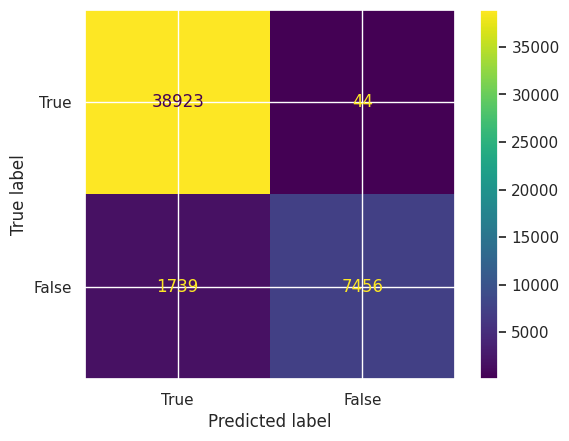

In [103]:
cm_test = confusion_matrix(y_test_if,pred_if_model_test)
cm_train_display = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [True,False])
cm_train_display.plot()
plt.show()

In [104]:
count0 = (df_test_if['Anomaly'] == 1).sum()
count1 = (df_test_if['Anomaly'] == -1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

7500 40662


In [105]:
anomaly_if_test = df_test_if[df_test_if['Anomaly'] == -1]
no_anomaly_if_test = df_test_if[df_test_if['Anomaly'] == 1]

In [106]:
#Coincidencias con modelo estadístico
print(anomaly_iqr_test['Timestamp'].isin(anomaly_if_test['Timestamp']).sum())

38923


<ipython-input-106-875fc83953b8>:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  print(anomaly_iqr_test['Timestamp'].isin(anomaly_if_test['Timestamp']).sum())


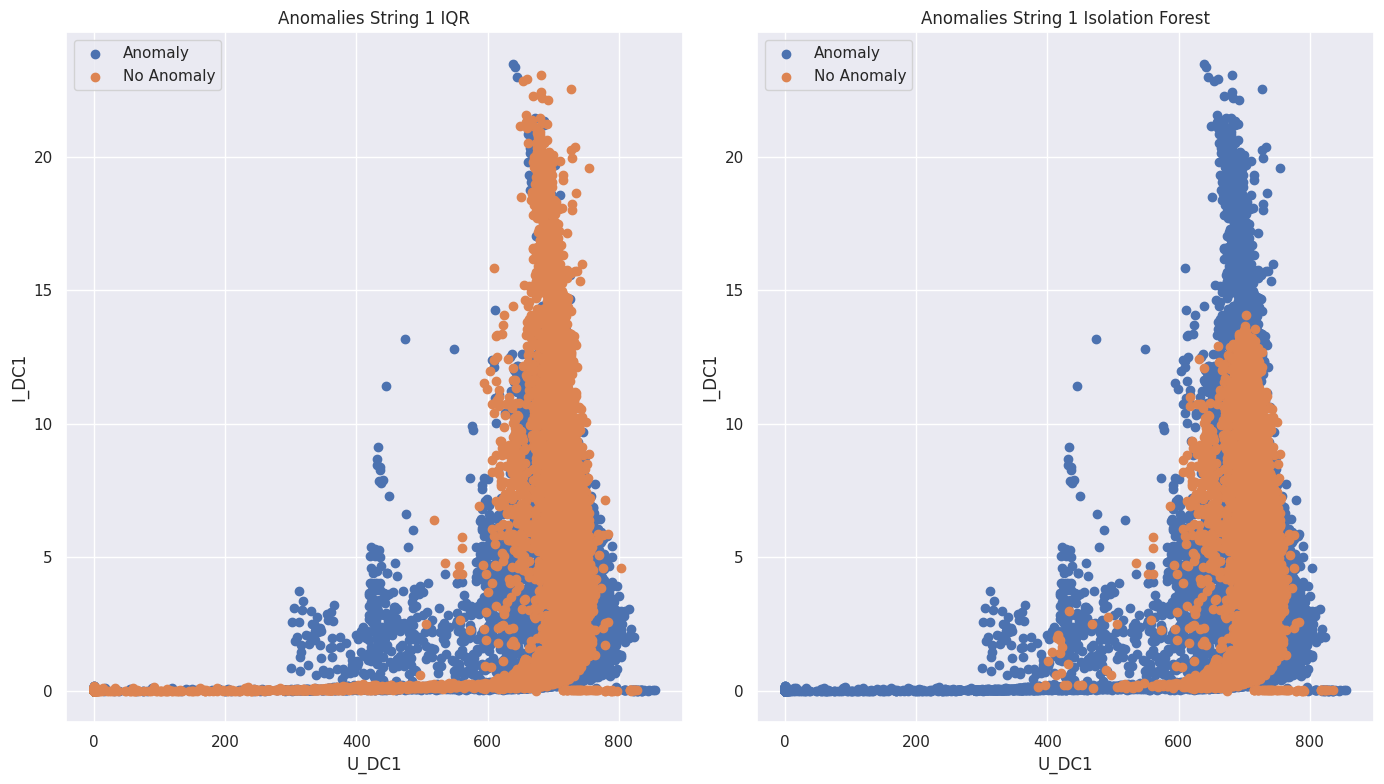

In [107]:
#STRING1

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_test['U_DC1'], anomaly_iqr_test['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_iqr_test['U_DC1'], no_anomaly_iqr_test['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_if_test['U_DC1'], anomaly_if_test['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_if_test['U_DC1'], no_anomaly_if_test['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 Isolation Forest')


# Ajustes de diseño
plt.tight_layout()
plt.show()

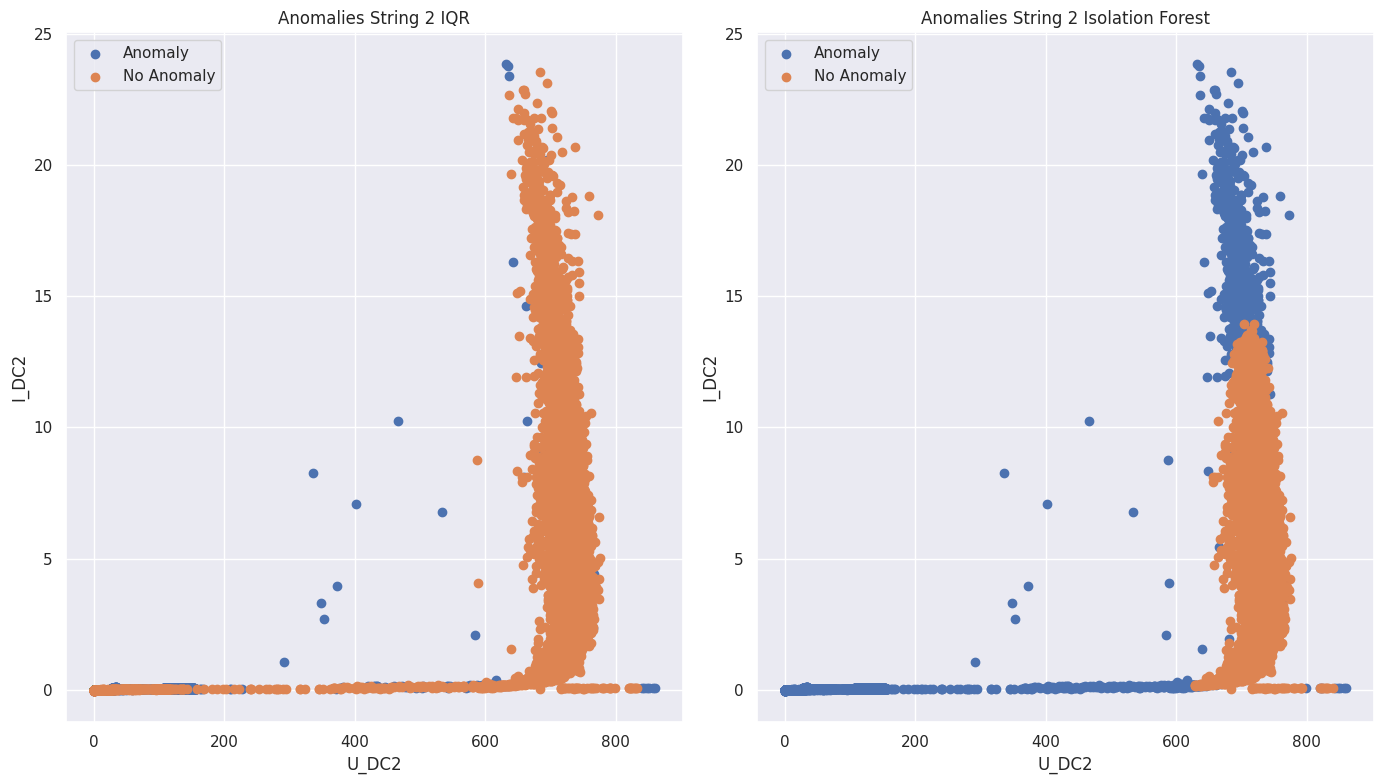

In [108]:
#STRING2

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_test['U_DC2'], anomaly_iqr_test['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_iqr_test['U_DC2'], no_anomaly_iqr_test['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_if_test['U_DC2'], anomaly_if_test['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_if_test['U_DC2'], no_anomaly_if_test['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 Isolation Forest')


# Ajustes de diseño
plt.tight_layout()
plt.show()

### *Método One-Class-SVM*

In [109]:
df_oc_svm = filtered_data

time = df_oc_svm[['Timestamp']]
rows_oc_svm = df_oc_svm[['U_DC1','U_DC2','I_DC1','I_DC2']]

df_train_oc_svm = df_oc_svm[(df_oc_svm['Timestamp'] < '2021-09-03')]
df_test_oc_svm = df_oc_svm[(df_oc_svm['Timestamp'] >= '2021-09-03')]

#scaler_gpu = cpp.StandardScaler()
scaled_df_oc_svm = scaler.fit_transform(rows_oc_svm)

x_train_oc_svm = scaled_df_oc_svm[0:102236]
x_test_oc_svm = scaled_df_oc_svm[102236:150398]

y_train_oc_svm = merged_df_train['Anomaly']
y_train_oc_svm[y_train_oc_svm == 1] = -1
y_train_oc_svm[y_train_oc_svm == 0] = 1

y_test_oc_svm = merged_df_test['Anomaly']
y_test_oc_svm[y_test_oc_svm == 1] = -1
y_test_oc_svm[y_test_oc_svm == 0] = 1

<ipython-input-109-674b6137191d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train_oc_svm[y_train_oc_svm == 1] = -1
<ipython-input-109-674b6137191d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train_oc_svm[y_train_oc_svm == 0] = 1
<ipython-input-109-674b6137191d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test_oc_svm[y_test_oc_svm == 1] = -1
<ipython-input-109-674b6137191d>:21: SettingWithCopyWarning: 
A value 

#### Datos de entrenamiento

In [110]:
"""
#One-Class SVM
svm_model = cuml.

param_grid_svm = {'nu': np.array(np.arange(0.01,1,0.01)),
                  'kernel': np.array(['linear', 'poly', 'rbf', 'sigmoid']),
                  'gamma': np.array(['scale', 'auto'])}


grid_svm_estimator = cuml.model_selection.GridSearchCV(svm_model,
                                                  param_grid_svm,
                                                  scoring='accuracy',
                                                  cv=5)

grid_svm_estimator.fit(x_train_oc_svm, y_train_oc_svm)


print("Best parameters found for One Class-SVM:")
print(grid_svm_estimator.best_params_)
"""
#Best Parameters Found
#gamma: auto
#kernel: rbf
#nu = 0.01

'\n#One-Class SVM\nsvm_model = cuml.\n\nparam_grid_svm = {\'nu\': np.array(np.arange(0.01,1,0.01)),\n                  \'kernel\': np.array([\'linear\', \'poly\', \'rbf\', \'sigmoid\']),\n                  \'gamma\': np.array([\'scale\', \'auto\'])}\n\n\ngrid_svm_estimator = cuml.model_selection.GridSearchCV(svm_model,\n                                                  param_grid_svm,\n                                                  scoring=\'accuracy\',\n                                                  cv=5)\n\ngrid_svm_estimator.fit(x_train_oc_svm, y_train_oc_svm)\n\n\nprint("Best parameters found for One Class-SVM:")\nprint(grid_svm_estimator.best_params_)\n'

In [111]:
best_svm_model = OneClassSVM(nu=0.01,kernel='rbf',gamma='auto')
best_svm_model.fit(x_train_oc_svm)
pred_oc_svm_model_train = np.array(best_svm_model.predict(x_train_oc_svm))
df_train_oc_svm['Anomaly'] = pred_oc_svm_model_train

<ipython-input-111-f3cc3da28f53>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_oc_svm['Anomaly'] = pred_oc_svm_model_train


In [112]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

accuracy = accuracy_score(y_train_oc_svm, pred_oc_svm_model_train)
precision = precision_score(y_train_oc_svm, pred_oc_svm_model_train)
f1_score = f1_score(y_train_oc_svm, pred_oc_svm_model_train)
recall = recall_score(y_train_oc_svm, pred_oc_svm_model_train)

print("Precision: "+ str(precision))
print("Accuracy: "+ str(accuracy))
print("F1_Score: "+ str(f1_score))
print("Recall: "+ str(recall))

Precision: 0.9162577625953973
Accuracy: 0.9121346688055089
F1_Score: 0.9538369828308315
Recall: 0.994630570381326


In [113]:
tp,tn,fn,fp = compute_tp_tn_fn_fp(y_train_oc_svm, pred_oc_svm_model_train)
print("Number of TP: "+str(tp))
print("Number of TN: "+str(tn))
print("Number of FP: "+str(fp))
print("Number of FN: "+str(fn))

Number of TP: 448
Number of TN: 92805
Number of FP: 8482
Number of FN: 501


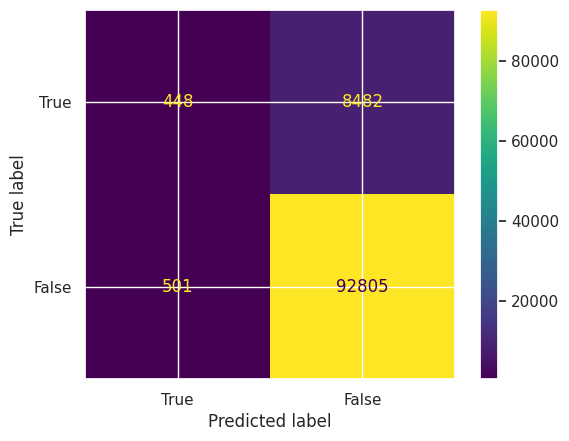

In [114]:
cm_train = confusion_matrix(y_train_oc_svm, pred_oc_svm_model_train)
cm_train_display = ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = [True,False])
cm_train_display.plot()
plt.show()

In [115]:
count0 = (df_train_oc_svm['Anomaly'] == 1).sum()
count1 = (df_train_oc_svm['Anomaly'] == -1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

101287 949


In [116]:
anomaly_oc_svm_train = df_train_oc_svm[df_train_oc_svm['Anomaly'] == -1]
no_anomaly_oc_svm_train = df_train_oc_svm[df_train_oc_svm['Anomaly'] == 1]

In [117]:
#Coincidencias con modelo estadístico
print(anomaly_iqr_train['Timestamp'].isin(anomaly_oc_svm_train['Timestamp']).sum())

448


<ipython-input-117-28ce1dcebe3b>:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  print(anomaly_iqr_train['Timestamp'].isin(anomaly_oc_svm_train['Timestamp']).sum())


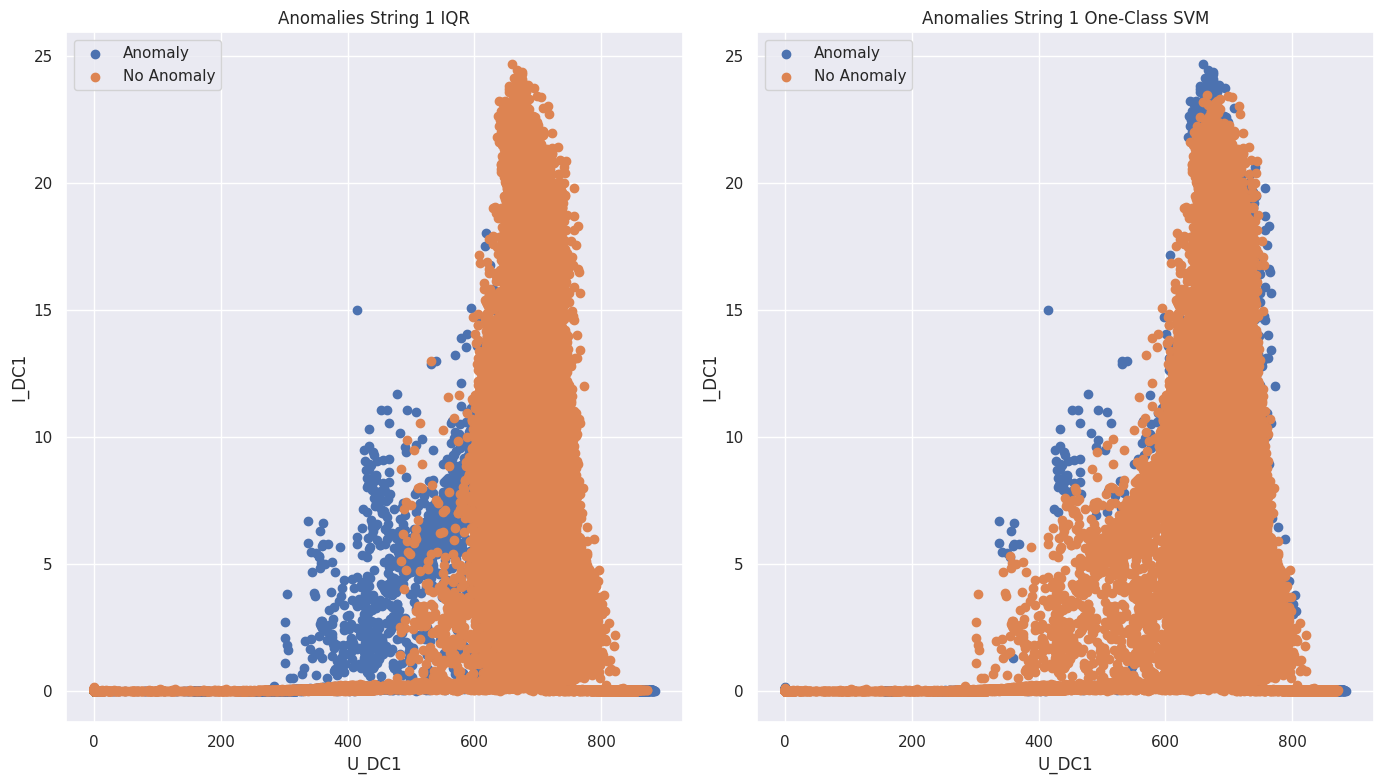

In [118]:
#STRING1

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_train['U_DC1'], anomaly_iqr_train['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_iqr_train['U_DC1'], no_anomaly_iqr_train['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_oc_svm_train['U_DC1'], anomaly_oc_svm_train['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_oc_svm_train['U_DC1'], no_anomaly_oc_svm_train['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 One-Class SVM')


# Ajustes de diseño
plt.tight_layout()
plt.show()

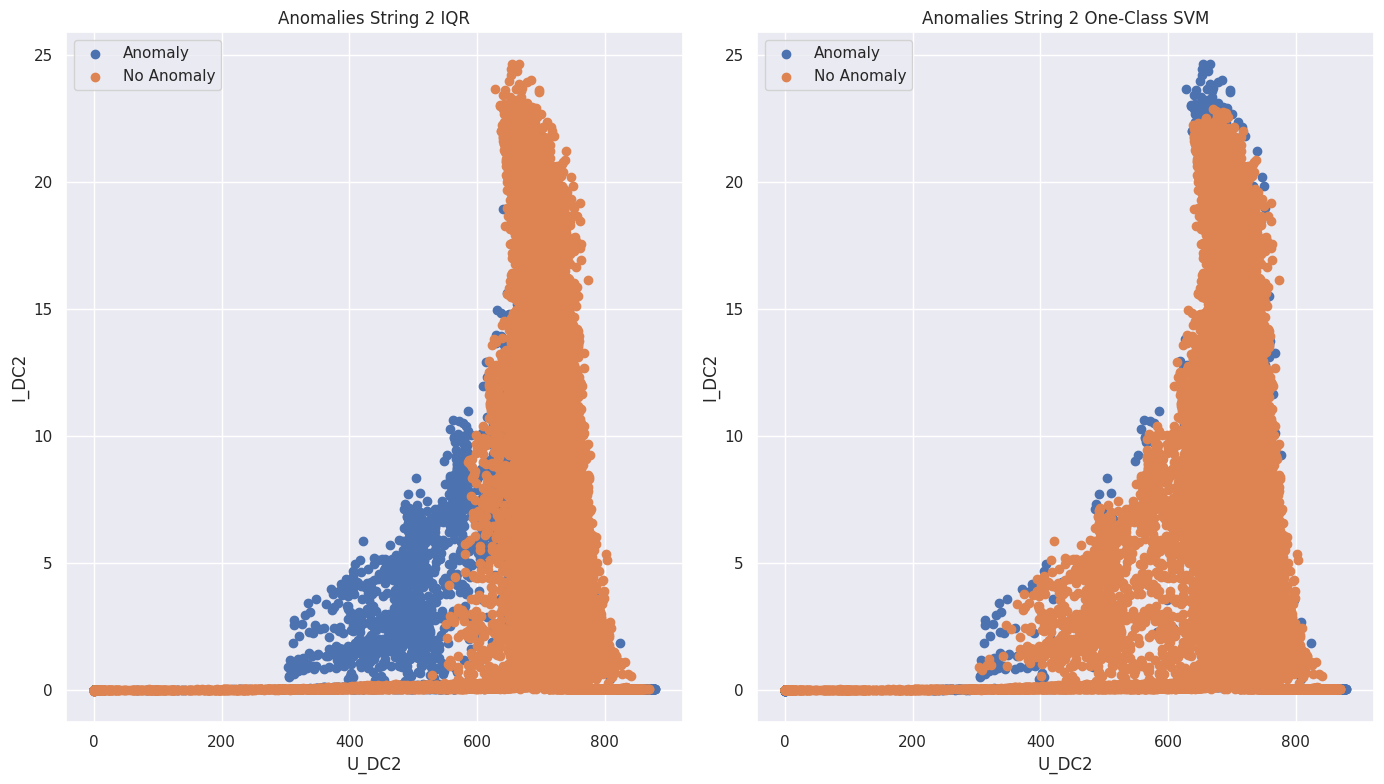

In [119]:
#STRING2

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_train['U_DC2'], anomaly_iqr_train['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_iqr_train['U_DC2'], no_anomaly_iqr_train['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_oc_svm_train['U_DC2'], anomaly_oc_svm_train['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_oc_svm_train['U_DC2'], no_anomaly_oc_svm_train['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 One-Class SVM')


# Ajustes de diseño
plt.tight_layout()
plt.show()

#### Datos de Prueba

In [120]:
pred_oc_svm_model_test = np.array(best_svm_model.predict(x_test_oc_svm))
df_test_oc_svm['Anomaly'] = pred_oc_svm_model_test

<ipython-input-120-805ce3812738>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_oc_svm['Anomaly'] = pred_oc_svm_model_test


In [121]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

accuracy = accuracy_score(y_test_oc_svm,pred_oc_svm_model_test)
precision = precision_score(y_test_oc_svm,pred_oc_svm_model_test)
f1_score = f1_score(y_test_oc_svm,pred_oc_svm_model_test)
recall = recall_score(y_test_oc_svm,pred_oc_svm_model_test)

print("Precision: "+ str(precision))
print("Accuracy: "+ str(accuracy))
print("F1_Score: "+ str(f1_score))
print("Recall: "+ str(recall))

Precision: 0.9811495316294668
Accuracy: 0.9818529130850048
F1_Score: 0.9510144602623024
Recall: 0.9226753670473083


In [122]:
tp,tn,fn,fp = compute_tp_tn_fn_fp(y_test_oc_svm,pred_oc_svm_model_test)
print("Number of TP: "+str(tp))
print("Number of TN: "+str(tn))
print("Number of FP: "+str(fp))
print("Number of FN: "+str(fn))

Number of TP: 38804
Number of TN: 8484
Number of FP: 163
Number of FN: 711


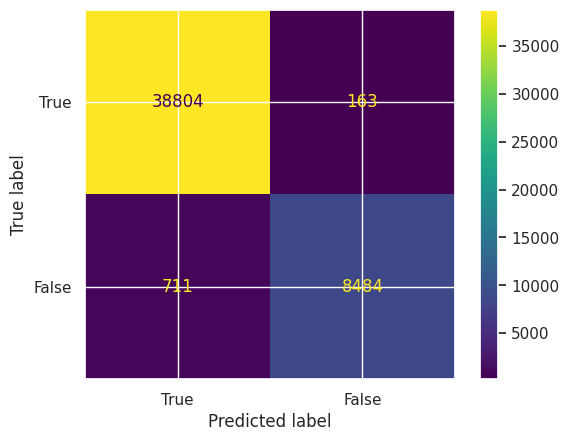

In [123]:
cm_test = confusion_matrix(y_test_oc_svm,pred_oc_svm_model_test)
cm_train_display = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [True,False])
cm_train_display.plot()
plt.show()

In [124]:
count0 = (df_test_oc_svm['Anomaly'] == 1).sum()
count1 = (df_test_oc_svm['Anomaly'] == -1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

8647 39515


In [125]:
anomaly_oc_svm_test = df_test_oc_svm[df_test_oc_svm['Anomaly'] == -1]
no_anomaly_oc_svm_test = df_test_oc_svm[df_test_oc_svm['Anomaly'] == 1]

In [126]:
#Coincidencias con modelo estadístico
print(anomaly_iqr_test['Timestamp'].isin(anomaly_oc_svm_test['Timestamp']).sum())

38804


<ipython-input-126-76430140553d>:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  print(anomaly_iqr_test['Timestamp'].isin(anomaly_oc_svm_test['Timestamp']).sum())


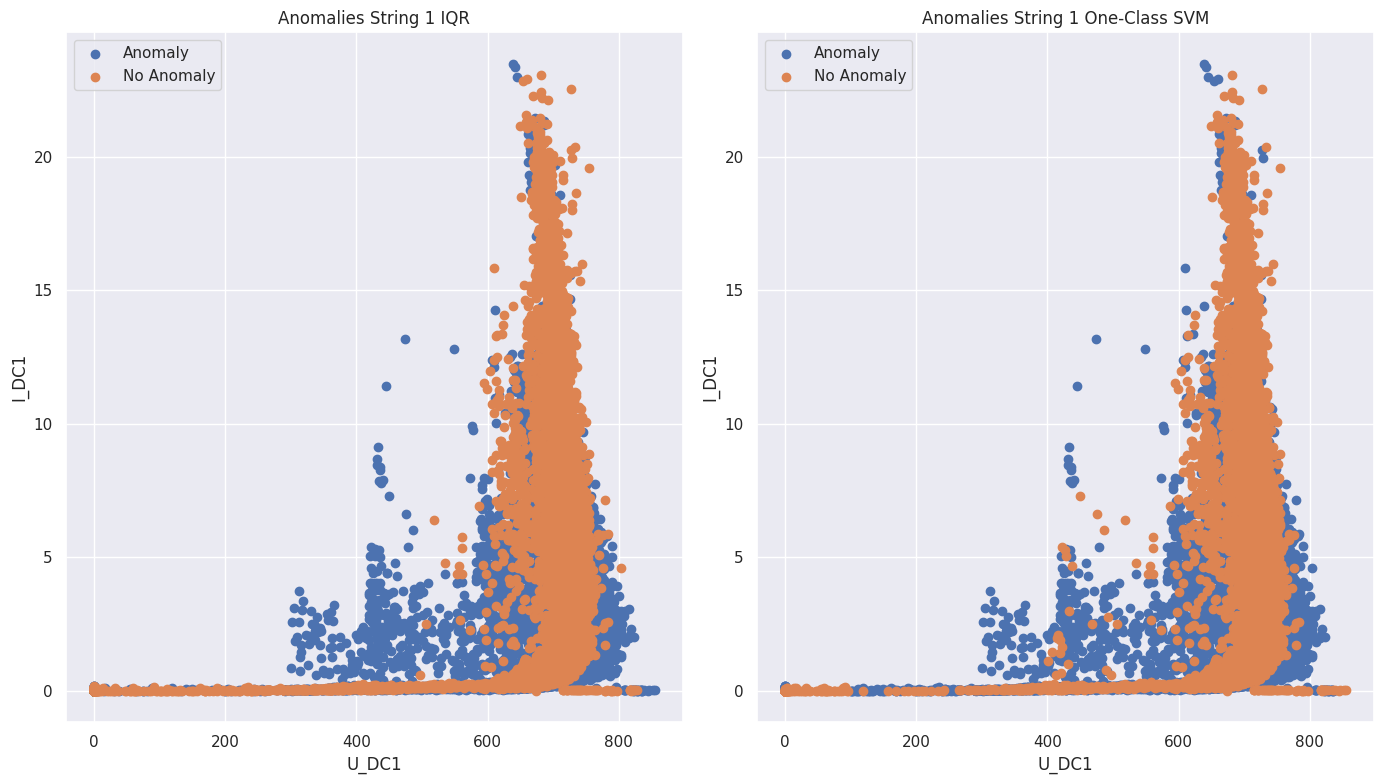

In [127]:
#STRING1

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_test['U_DC1'], anomaly_iqr_test['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_iqr_test['U_DC1'], no_anomaly_iqr_test['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_oc_svm_test['U_DC1'], anomaly_oc_svm_test['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_oc_svm_test['U_DC1'], no_anomaly_oc_svm_test['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 One-Class SVM')


# Ajustes de diseño
plt.tight_layout()
plt.show()

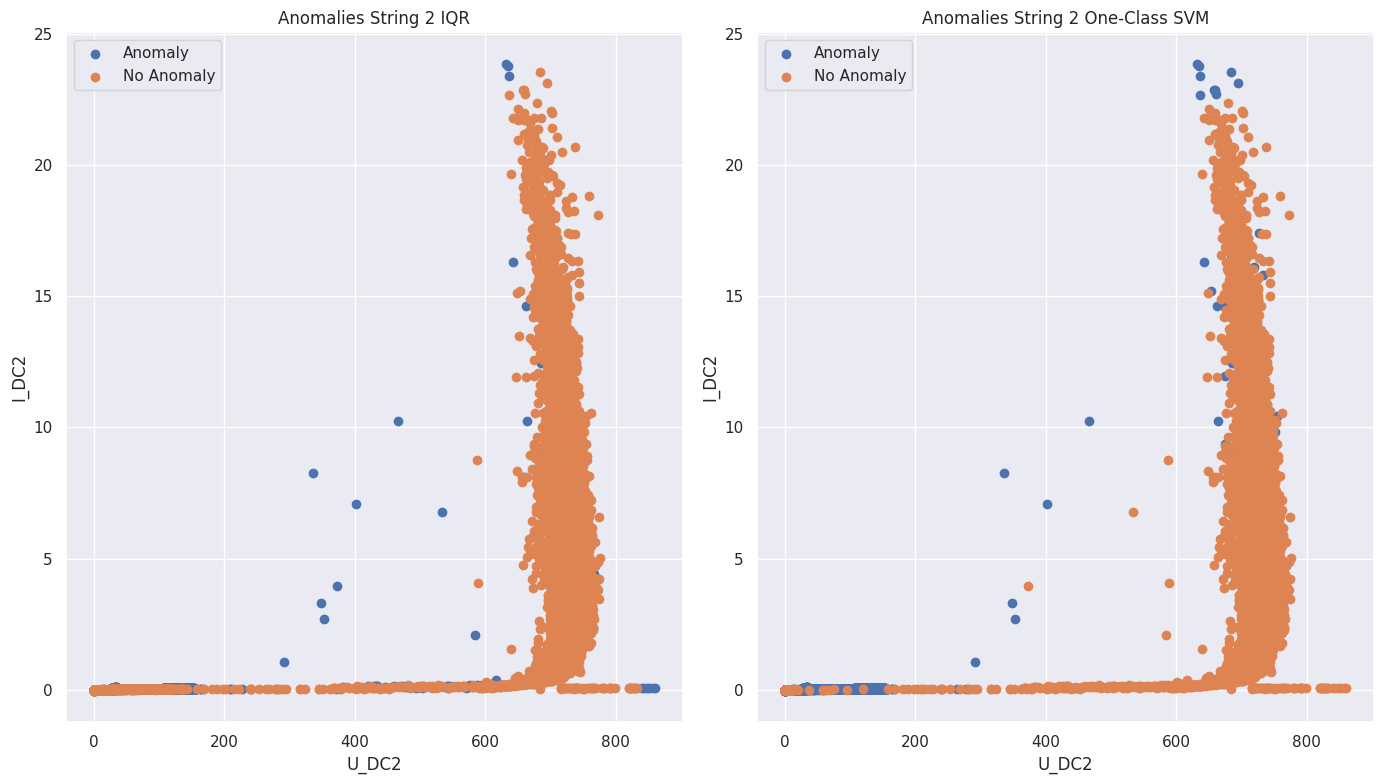

In [128]:
#STRING2

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_test['U_DC2'], anomaly_iqr_test['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_iqr_test['U_DC2'], no_anomaly_iqr_test['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_oc_svm_test['U_DC2'], anomaly_oc_svm_test['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_oc_svm_test['U_DC2'], no_anomaly_oc_svm_test['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 One-Class SVM')


# Ajustes de diseño
plt.tight_layout()
plt.show()

### *Método Local Outlier Factor*

In [153]:
df_lof = filtered_data

time = df_lof[['Timestamp']]
rows_lof = df_lof[['U_DC1','U_DC2','I_DC1','I_DC2']]

df_train_lof = df_lof[(df_lof['Timestamp'] < '2021-09-03')]
df_test_lof = df_lof[(df_lof['Timestamp'] >= '2021-09-03')]

scaled_df_lof = scaler.fit_transform(rows_lof)

x_train_lof = scaled_df_lof[0:102236]
x_test_lof = scaled_df_lof[102236:150398]

In [170]:
y_train_lof = np.array(merged_df_train['Anomaly'])

In [171]:
np.unique(y_train_lof)

array([-1,  1])

In [162]:
y_train_lof[y_train_lof == 1] = -1
y_train_lof[y_train_lof == 0] = 1

In [205]:
y_test_lof = np.array(merged_df_test['Anomaly'])
#y_test_lof[y_test_lof == 1] = -1
#y_test_lof[y_test_lof == 0] = 1

In [206]:
np.unique(y_test_lof)

array([-1,  1])

In [163]:
y_train_lof

array([-1, -1, -1, ..., -1, -1, -1])

In [172]:
np.count_nonzero(y_train_lof == -1)

8930

In [173]:
np.count_nonzero(y_train_lof == 1)

93306

#### Datos de entrenamiento

In [132]:
"""
lof_model = LocalOutlierFactor(novelty=True)



param_grid_lof = {'n_neighbors': np.arange(5,50,5)}

grid_lof_estimator = model_selection.GridSearchCV(lof_model,
                                                  param_grid_lof,
                                                  scoring='accuracy',
                                                  cv=5,
                                                  n_jobs=-1)

grid_lof_estimator.fit(x_train_lof, y_train_lof)


print("Best parameters found in Isolation Forest:")
print(grid_lof_estimator.best_params_)
"""
#Best parameters
#n_neighbors=10

'\nlof_model = LocalOutlierFactor(novelty=True)\n\n\n\nparam_grid_lof = {\'n_neighbors\': np.arange(5,50,5)}\n\ngrid_lof_estimator = model_selection.GridSearchCV(lof_model,\n                                                  param_grid_lof,\n                                                  scoring=\'accuracy\',\n                                                  cv=5,\n                                                  n_jobs=-1)\n\ngrid_lof_estimator.fit(x_train_lof, y_train_lof)\n\n\nprint("Best parameters found in Isolation Forest:")\nprint(grid_lof_estimator.best_params_)\n'

In [174]:
best_lof = LocalOutlierFactor(n_neighbors=10,contamination='auto',novelty=True)
best_lof.fit(x_train_lof)
pred_lof_model_train = np.array(best_lof.predict(x_train_lof))
df_train_lof['Anomaly'] = pred_lof_model_train

<ipython-input-174-430e5c26487f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_lof['Anomaly'] = pred_lof_model_train


In [175]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

accuracy = accuracy_score(y_train_lof, pred_lof_model_train)
precision = precision_score(y_train_lof, pred_lof_model_train)
f1_score = f1_score(y_train_lof, pred_lof_model_train)
recall = recall_score(y_train_lof, pred_lof_model_train)

print("Precision: "+ str(precision))
print("Accuracy: "+ str(accuracy))
print("F1_Score: "+ str(f1_score))
print("Recall: "+ str(recall))

Precision: 0.9139235207940921
Accuracy: 0.8998493681286436
F1_Score: 0.9471254395885297
Recall: 0.9828306861295093


In [176]:
tp,tn,fn,fp = compute_tp_tn_fn_fp(y_train_lof, pred_lof_model_train)
print("Number of TP: "+str(tp))
print("Number of TN: "+str(tn))
print("Number of FP: "+str(fp))
print("Number of FN: "+str(fn))

Number of TP: 293
Number of TN: 91704
Number of FP: 8637
Number of FN: 1602


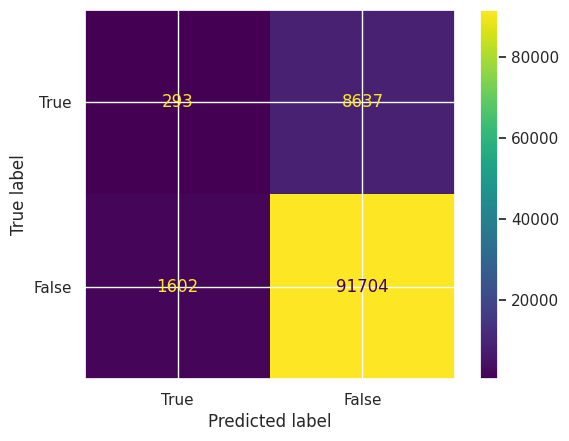

In [177]:
cm_train = confusion_matrix(y_train_lof, pred_lof_model_train)
cm_train_display = ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = [True,False])
cm_train_display.plot()
plt.show()

In [178]:
count0 = (df_train_lof['Anomaly'] == 1).sum()
count1 = (df_train_lof['Anomaly'] == -1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

100341 1895


In [179]:
anomaly_lof_train = df_train_lof[df_train_lof['Anomaly'] == -1]
no_anomaly_lof_train = df_train_lof[df_train_lof['Anomaly'] == 1]

In [180]:
#Coincidencias con modelo estadístico
print(anomaly_iqr_train['Timestamp'].isin(anomaly_lof_train['Timestamp']).sum())

293


<ipython-input-180-158d99d1cd2b>:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  print(anomaly_iqr_train['Timestamp'].isin(anomaly_lof_train['Timestamp']).sum())


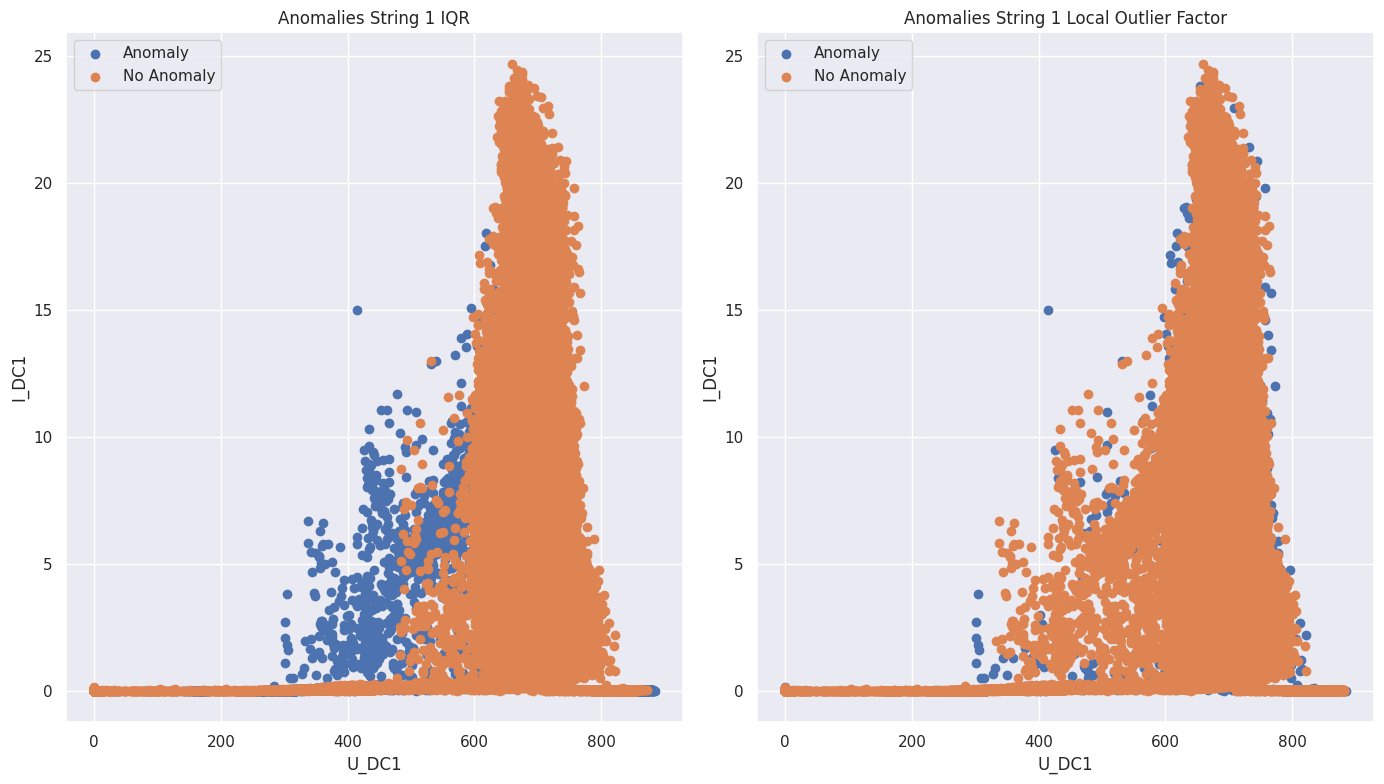

In [181]:
#STRING1

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_train['U_DC1'], anomaly_iqr_train['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_iqr_train['U_DC1'], no_anomaly_iqr_train['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_lof_train['U_DC1'], anomaly_lof_train['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_lof_train['U_DC1'], no_anomaly_lof_train['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 Local Outlier Factor')


# Ajustes de diseño
plt.tight_layout()
plt.show()

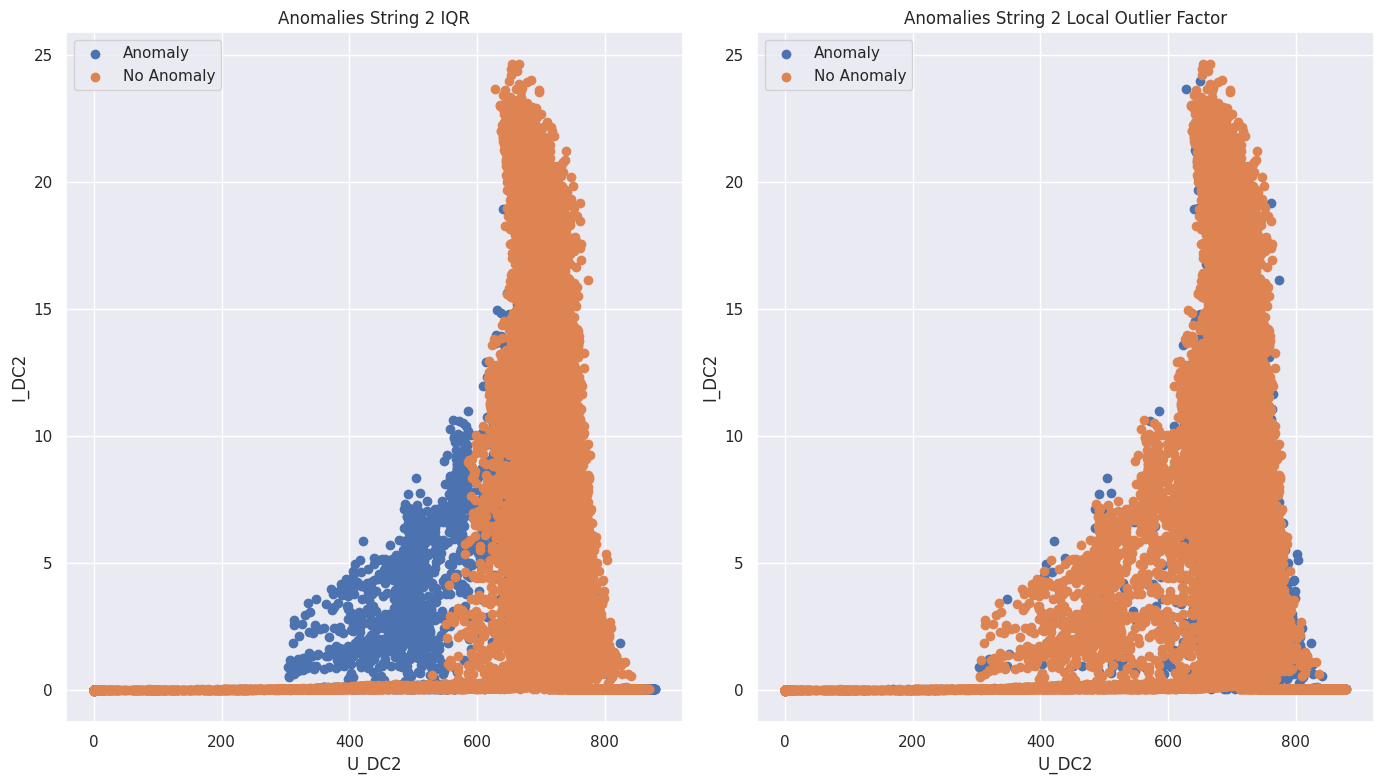

In [141]:
#STRING1

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_train['U_DC2'], anomaly_iqr_train['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_iqr_train['U_DC2'], no_anomaly_iqr_train['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_lof_train['U_DC2'], anomaly_lof_train['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_lof_train['U_DC2'], no_anomaly_lof_train['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 Local Outlier Factor')


# Ajustes de diseño
plt.tight_layout()
plt.show()

#### Datos de prueba

In [207]:
pred_lof_model_test = np.array(best_lof.predict(x_test_lof))
df_test_lof['Anomaly'] = pred_lof_model_test

<ipython-input-207-4feff52ca1de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_lof['Anomaly'] = pred_lof_model_test


In [208]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

accuracy = accuracy_score(y_test_lof, pred_lof_model_test)
precision = precision_score(y_test_lof, pred_lof_model_test)
f1_score = f1_score(y_test_lof, pred_lof_model_test)
recall = recall_score(y_test_lof, pred_lof_model_test)

print("Precision: "+ str(precision))
print("Accuracy: "+ str(accuracy))
print("F1_Score: "+ str(f1_score))
print("Recall: "+ str(recall))

Precision: 0.9791666666666666
Accuracy: 0.970495411320128
F1_Score: 0.9178944935575201
Recall: 0.8638390429581294


In [209]:
tp,tn,fn,fp = compute_tp_tn_fn_fp(y_test_lof, pred_lof_model_test)
print("Number of TP: "+str(tp))
print("Number of TN: "+str(tn))
print("Number of FP: "+str(fp))
print("Number of FN: "+str(fn))

Number of TP: 38798
Number of TN: 7943
Number of FP: 169
Number of FN: 1252


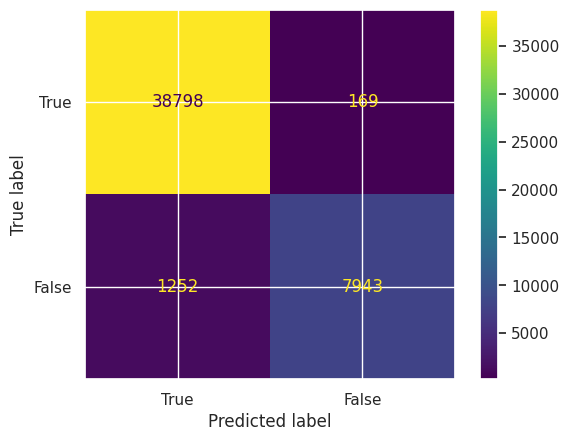

In [210]:
cm_test = confusion_matrix(y_test_lof, pred_lof_model_test)
cm_train_display = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [True,False])
cm_train_display.plot()
plt.show()

In [211]:
count0 = (df_test_lof['Anomaly'] == 1).sum()
count1 = (df_test_lof['Anomaly'] == -1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

8112 40050


In [212]:
anomaly_lof_test = df_test_lof[df_test_lof['Anomaly'] == -1]
no_anomaly_lof_test = df_test_lof[df_test_lof['Anomaly'] == 1]

#### Graficas

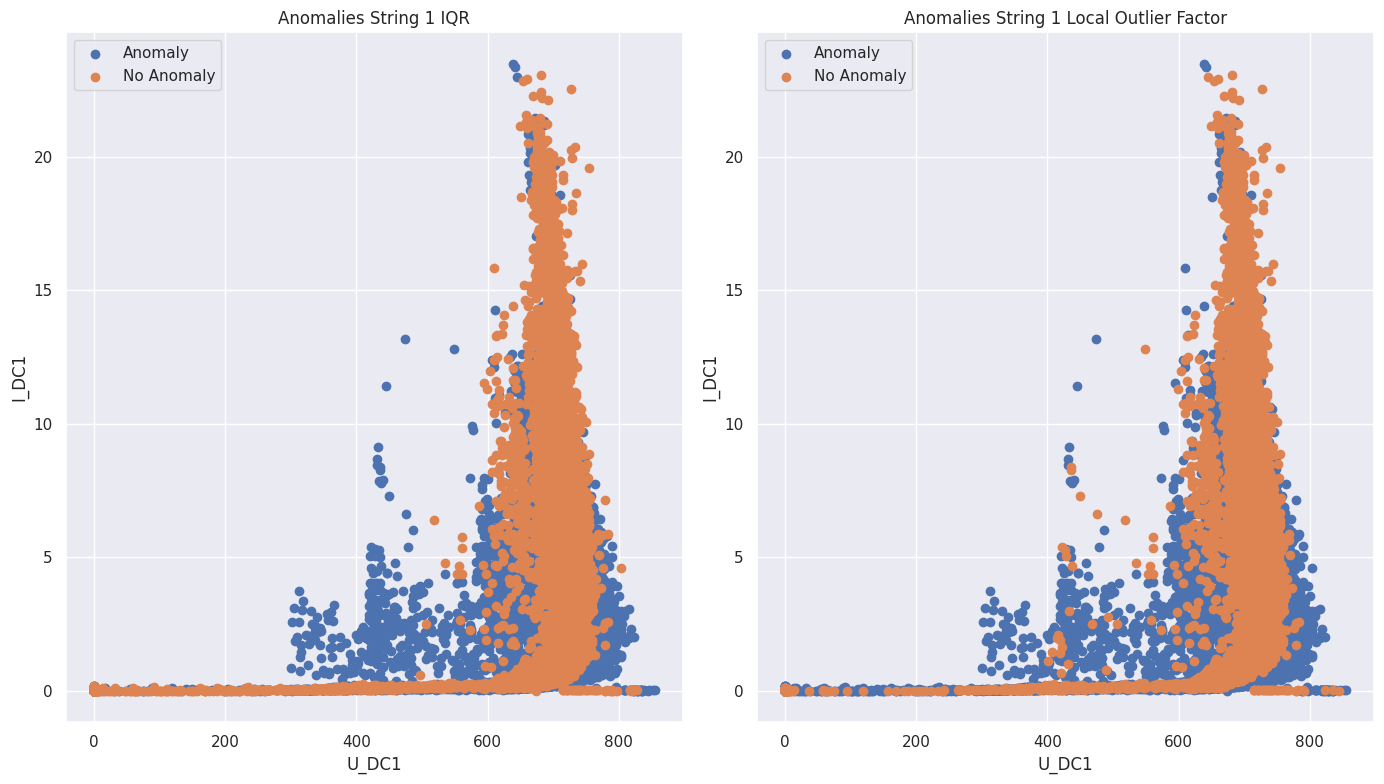

In [188]:
#STRING1

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_test['U_DC1'], anomaly_iqr_test['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_iqr_test['U_DC1'], no_anomaly_iqr_test['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_lof_test['U_DC1'], anomaly_lof_test['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_lof_test['U_DC1'], no_anomaly_lof_test['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 Local Outlier Factor')


# Ajustes de diseño
plt.tight_layout()
plt.show()

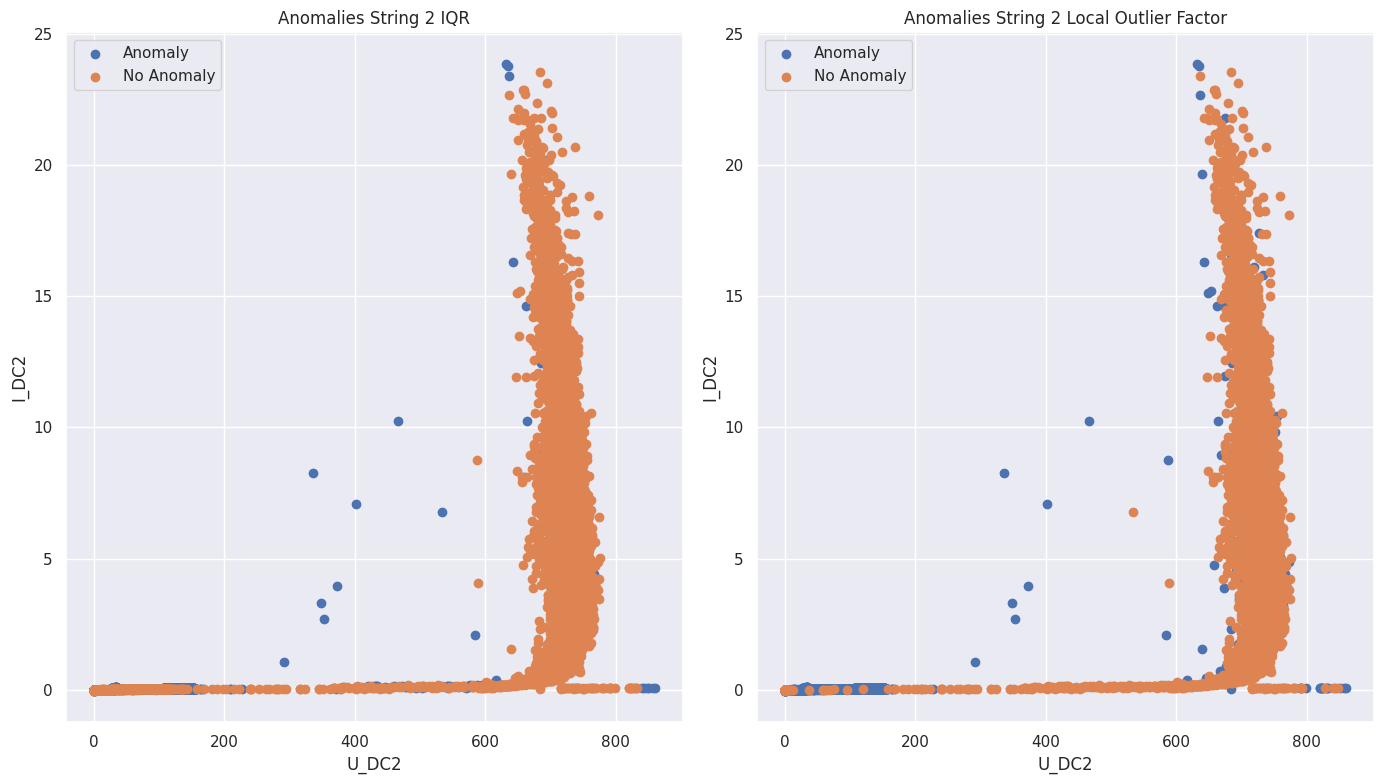

In [189]:
#STRING2

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_test['U_DC2'], anomaly_iqr_test['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_iqr_test['U_DC2'], no_anomaly_iqr_test['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_lof_test['U_DC2'], anomaly_lof_test['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_lof_test['U_DC2'], no_anomaly_lof_test['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 Local Outlier Factor')


# Ajustes de diseño
plt.tight_layout()
plt.show()

### *Método Robust Covariance*

In [190]:
df_rc = filtered_data

time = df_rc[['Timestamp']]
rows_rc = df_rc[['U_DC1','U_DC2','I_DC1','I_DC2']]

df_train_rc = df_rc[(df_rc['Timestamp'] < '2021-09-03')]
df_test_rc = df_rc[(df_rc['Timestamp'] >= '2021-09-03')]

scaled_df_rc = scaler.fit_transform(rows_rc)

x_train_rc = scaled_df_rc[0:102236]
x_test_rc = scaled_df_rc[102236:150398]

In [197]:
y_train_rc = np.array(merged_df_train['Anomaly'])

In [198]:
np.unique(y_train_rc)

array([-1,  1])

In [194]:
y_train_rc[y_train_rc == 1] = -1
y_train_rc[y_train_rc == 0] = 1

In [199]:
np.unique(y_train_rc)

array([-1,  1])

In [213]:
y_test_rc = np.array(merged_df_test['Anomaly'])
#y_test_rc[y_test_rc == 1] = -1
#y_test_rc[y_test_rc == 0] = 1

In [214]:
np.unique(y_test_rc)

array([-1,  1])

In [215]:
np.count_nonzero(y_train_lof == -1)

8930

In [216]:
np.count_nonzero(y_train_lof == 1)

93306

Datos de entrenamiento

### *Método Autoencoder*

In [ ]:
df_ae = filtered_data

time = df_ae[['Timestamp']]
rows_ae = df_ae[['U_DC1','U_DC2','I_DC1','I_DC2']]

df_train_ae = df_ae[(df_ae['Timestamp'] < '2021-09-03')]
df_test_ae = df_ae[(df_ae['Timestamp'] >= '2021-09-03')]

rows_ae_train = df_train_ae[['U_DC1','U_DC2','I_DC1','I_DC2']]
rows_ae_test = df_test_ae[['U_DC1','U_DC2','I_DC1','I_DC2']]

x_train_ae = scaler.fit_transform(rows_ae_train)
x_test_ae = scaler.transform(rows_ae_test)

y_train_ae = np.array(merged_df_train['Anomaly'])
y_test_ae = np.array(merged_df_test['Anomaly'])


In [ ]:
y_train_ae

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Reshape LSTM Data

x_train_ae_lstm = x_train_ae.reshape(x_train_ae.shape[0],1,x_train_ae.shape[1])
print("Training data shape:", x_train_ae_lstm.shape)
x_test_ae_lstm = x_test_ae.reshape(x_test_ae.shape[0],1,x_test_ae.shape[1])
print("Testing data shape:", x_test_ae_lstm.shape)

Training data shape: (102236, 1, 4)
Testing data shape: (48162, 1, 4)


#### Datos de entrenamiento

In [ ]:
"""
#Model 1 - 3 Layers without counting input and output
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(4, activation='relu', return_sequences=False,
              kernel_regularizer=regularizers.l2(0.01))(inputs)
    L1 = Dropout(0.1)(L1)
    L2 = RepeatVector(X.shape[1])(L1)
    L3 = LSTM(4, activation='relu', return_sequences=True, kernel_regularizer=regularizers.l2(0.01))(L2)
    L3 = Dropout(0.1)(L3)
    output = TimeDistributed(Dense(X.shape[2]))(L3)
    model = Model(inputs=inputs, outputs=output)
    return model
"""
"""
#Model 2 - 5 layers without counting input and output
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.01))(inputs)
    L1 = Dropout(0.1)(L1)
    L2 = LSTM(4, activation='relu', return_sequences=False,kernel_regularizer=regularizers.l2(0.01))(L1)
    L2 = Dropout(0.1)(L2)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True,kernel_regularizer=regularizers.l2(0.01))(L3)
    L4 = Dropout(0.1)(L4)
    L5 = LSTM(16, activation='relu', return_sequences=True,kernel_regularizer=regularizers.l2(0.01))(L4)
    L5 = Dropout(0.1)(L5)

    output = TimeDistributed(Dense(X.shape[2]))(L5)
    model = Model(inputs=inputs, outputs=output)
    return model
"""

"""

#Model 3 - 7 layers without counting input and output
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(64, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.01))(inputs)
    L1 = Dropout(0.1)(L1)
    L2 = LSTM(16, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.01))(L1)
    L2 = Dropout(0.1)(L2)
    L3 = LSTM(4, activation='relu', return_sequences=False,
              kernel_regularizer=regularizers.l2(0.01))(L2)
    L3 = Dropout(0.1)(L3)
    L4 = RepeatVector(X.shape[1])(L3)
    L5 = LSTM(4, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.01))(L4)
    L5 = Dropout(0.1)(L5)
    L6 = LSTM(16, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.01))(L5)
    L6 = Dropout(0.1)(L6)
    L7 = LSTM(64, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.01))(L6)
    L7 = Dropout(0.2)(L7)

    output = TimeDistributed(Dense(X.shape[2]))(L7)
    model = Model(inputs=inputs, outputs=output)
    return model
"""

#Model 4 - 9 layers without counting input and output
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(256, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.01))(inputs)
    L1 = Dropout(0.1)(L1)
    L2 = LSTM(64, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.01))(L1)
    L2 = Dropout(0.1)(L2)
    L3 = LSTM(16, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.01))(L2)
    L3 = Dropout(0.1)(L3)
    L4 = LSTM(4, activation='relu', return_sequences=False,
              kernel_regularizer=regularizers.l2(0.01))(L3)
    L4 = Dropout(0.1)(L4)
    L5 = RepeatVector(X.shape[1])(L4)
    L6 = LSTM(4, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.01))(L5)
    L6 = Dropout(0.1)(L6)
    L7 = LSTM(16, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.01))(L6)
    L7 = Dropout(0.1)(L7)
    L8 = LSTM(64, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.01))(L7)
    L8 = Dropout(0.1)(L8)
    L9 = LSTM(256, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.01))(L8)
    L9 = Dropout(0.1)(L9)
    output = TimeDistributed(Dense(X.shape[2]))(L9)
    model = Model(inputs=inputs, outputs=output)
    return model
"""

# Model 5 - 11 layers without counting input and output
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(1024, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L1 = Dropout(0.2)(L1)
    L2 = LSTM(256, activation='relu', return_sequences=True)(L1)
    L2 = Dropout(0.2)(L2)
    L3 = LSTM(64, activation='relu', return_sequences=True)(L2)
    L3 = Dropout(0.2)(L3)
    L4 = LSTM(16, activation='relu', return_sequences=True)(L3)
    L4 = Dropout(0.2)(L4)
    L5 = LSTM(4, activation='relu', return_sequences=False)(L4)
    L5 = Dropout(0.2)(L5)
    L6 = RepeatVector(X.shape[1])(L5)
    L7 = LSTM(4, activation='relu', return_sequences=True)(L6)
    L7 = Dropout(0.2)(L7)
    L8 = LSTM(16, activation='relu', return_sequences=True)(L7)
    L8 = Dropout(0.2)(L8)
    L9 = LSTM(64, activation='relu', return_sequences=True)(L8)
    L9 = Dropout(0.2)(L9)
    L10 = LSTM(256, activation='relu', return_sequences=True)(L9)
    L10 = Dropout(0.2)(L10)
    L11 = LSTM(1024, activation='relu', return_sequences=True)(L10)
    L11 = Dropout(0.2)(L11)

    output = TimeDistributed(Dense(X.shape[2]))(L11)
    model = Model(inputs=inputs, outputs=output)
    return model
"""

"\n\n# Model 5 - 11 layers without counting input and output\ndef autoencoder_model(X):\n    inputs = Input(shape=(X.shape[1], X.shape[2]))\n    L1 = LSTM(1024, activation='relu', return_sequences=True,\n              kernel_regularizer=regularizers.l2(0.00))(inputs)\n    L1 = Dropout(0.2)(L1)\n    L2 = LSTM(256, activation='relu', return_sequences=True)(L1)\n    L2 = Dropout(0.2)(L2)\n    L3 = LSTM(64, activation='relu', return_sequences=True)(L2)\n    L3 = Dropout(0.2)(L3)\n    L4 = LSTM(16, activation='relu', return_sequences=True)(L3)\n    L4 = Dropout(0.2)(L4)\n    L5 = LSTM(4, activation='relu', return_sequences=False)(L4)\n    L5 = Dropout(0.2)(L5)\n    L6 = RepeatVector(X.shape[1])(L5)\n    L7 = LSTM(4, activation='relu', return_sequences=True)(L6)\n    L7 = Dropout(0.2)(L7)\n    L8 = LSTM(16, activation='relu', return_sequences=True)(L7)\n    L8 = Dropout(0.2)(L8)\n    L9 = LSTM(64, activation='relu', return_sequences=True)(L8)\n    L9 = Dropout(0.2)(L9)\n    L10 = LSTM(256, a

In [ ]:
ae_model = autoencoder_model(x_train_ae_lstm)
ae_model.compile(optimizer='adam',loss='mae')
ae_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1, 4)]            0         
                                                                 
 lstm_28 (LSTM)              (None, 1, 256)            267264    
                                                                 
 dropout_28 (Dropout)        (None, 1, 256)            0         
                                                                 
 lstm_29 (LSTM)              (None, 1, 64)             82176     
                                                                 
 dropout_29 (Dropout)        (None, 1, 64)             0         
                                                                 
 lstm_30 (LSTM)              (None, 1, 16)             5184      
                                                                 
 dropout_30 (Dropout)        (None, 1, 16)             0   

In [ ]:
nb_epochs = 100
batch_size = 32
history = ae_model.fit(x_train_ae_lstm, x_train_ae_lstm, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.1).history

Epoch 1/100
2876/2876 [==============================] - 86s 25ms/step - loss: 0.6542 - val_loss: 0.6630
Epoch 2/100
2876/2876 [==============================] - 74s 26ms/step - loss: 0.5830 - val_loss: 0.6874
Epoch 3/100
2876/2876 [==============================] - 71s 25ms/step - loss: 0.5829 - val_loss: 0.6694
Epoch 4/100
2876/2876 [==============================] - 71s 25ms/step - loss: 0.5829 - val_loss: 0.6852
Epoch 5/100
2876/2876 [==============================] - 74s 26ms/step - loss: 0.5829 - val_loss: 0.6832
Epoch 6/100
2876/2876 [==============================] - 70s 24ms/step - loss: 0.5829 - val_loss: 0.6824
Epoch 7/100
2876/2876 [==============================] - 71s 25ms/step - loss: 0.5828 - val_loss: 0.6740
Epoch 8/100
2876/2876 [==============================] - 70s 24ms/step - loss: 0.5829 - val_loss: 0.6860
Epoch 9/100
2876/2876 [==============================] - 72s 25ms/step - loss: 0.5828 - val_loss: 0.6798
Epoch 10/100
2876/2876 [==============================]

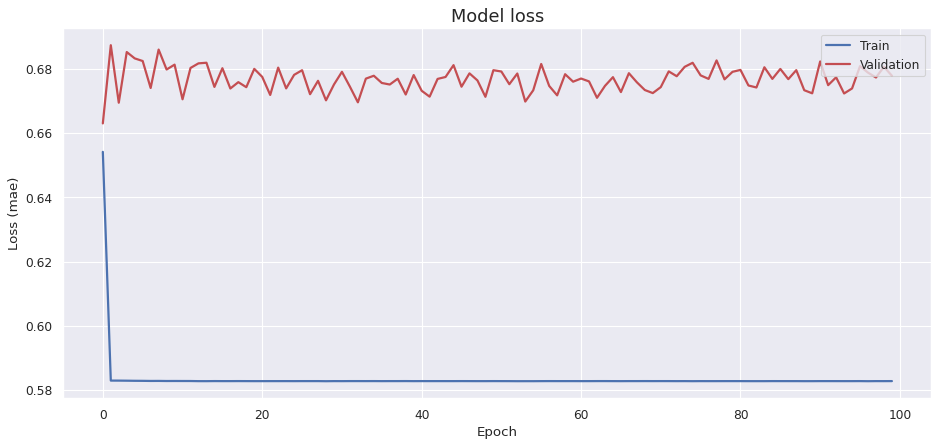

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [ ]:
x_pred_ae = ae_model.predict(x_train_ae_lstm)
x_pred_ae = x_pred_ae.reshape(x_pred_ae.shape[0], x_pred_ae.shape[2])
x_pred_ae = pd.DataFrame(x_pred_ae, columns=rows_ae_train.columns)

3195/3195 [==============================] - 14s 4ms/step


In [ ]:
scored = pd.DataFrame()
x_train_layers = x_train_ae_lstm.reshape(x_train_ae_lstm.shape[0], x_train_ae_lstm.shape[2])
scored['Loss_mae'] = np.mean(np.abs(x_pred_ae - x_train_layers),axis=1)

<ipython-input-123-bf2200df796d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scored['Loss_mae'], bins = 100, kde= True, color = 'blue');


(0.0, 3.5)

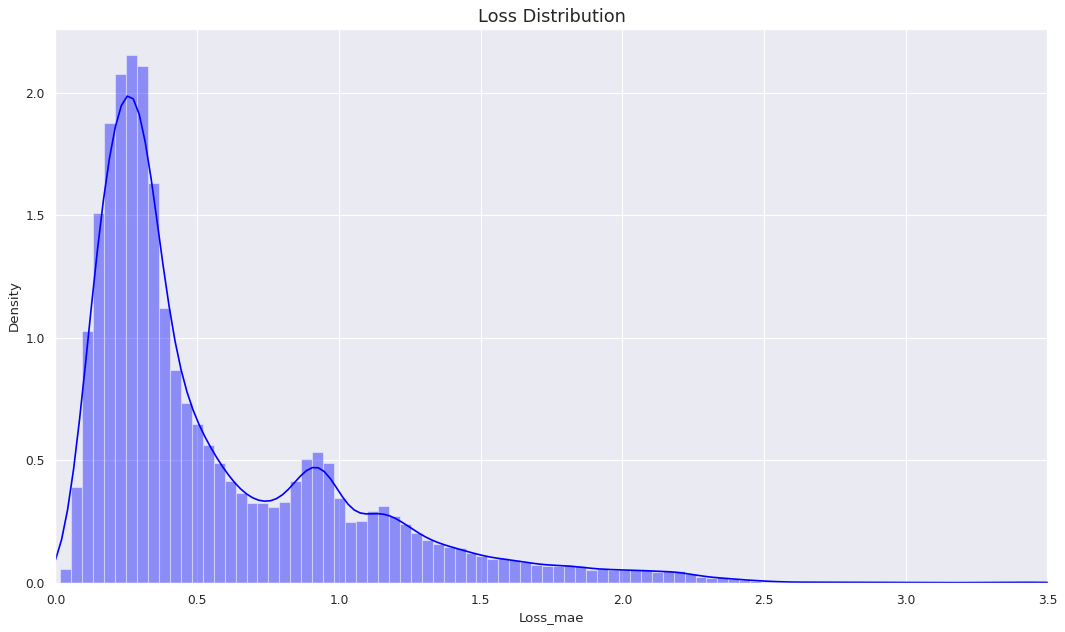

In [ ]:
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 100, kde= True, color = 'blue');
plt.xlim([0.0,3.5])

In [ ]:
scored['Threshold'] = 0.75
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
anomalies_ae_train = np.array(scored['Anomaly'])
anomalies_ae_train = anomalies_ae_train.astype(int)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


accuracy = accuracy_score(anomalies_ae_train,y_train_ae)
precision = precision_score(anomalies_ae_train,y_train_ae)
f1_score = f1_score(anomalies_ae_train,y_train_ae)
recall = recall_score(anomalies_ae_train,y_train_ae)

print("Precision: "+ str(precision))
print("Accuracy: "+ str(accuracy))
print("F1_Score: "+ str(f1_score))
print("Recall: "+ str(recall))

anomalies_ae_train[anomalies_ae_train==1].shape

Precision: 0.9507278835386338
Accuracy: 0.8002464885167652
F1_Score: 0.45398641783861826
Recall: 0.2981876931722394


(28472,)

Text(0.5, 1.0, 'Confusion Matrix for LSTM Autoencoder - Train Data')

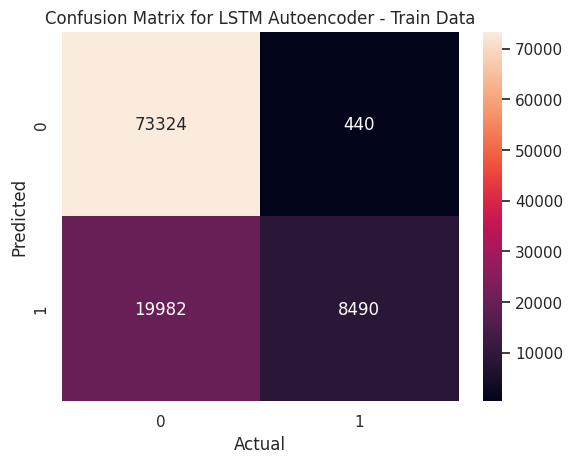

In [ ]:
cm_train = confusion_matrix(anomalies_ae_train,y_train_ae)
sns.heatmap(cm_train,annot=True, fmt='g')
# Set the axis labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix for LSTM Autoencoder - Train Data')

In [ ]:
#Make Confusion Matrix and Evaluate TP, TN, FN, FP
def compute_tp_tn_fn_fp(y_act, y_pred):
    tp = sum((y_act == 1) & (y_pred == 1))
    tn = sum((y_act == 0) & (y_pred == 0))
    fn = sum((y_act == 1) & (y_pred == 0))
    fp = sum((y_act == 0) & (y_pred == 1))
    return tp, tn, fp, fn

tp,tn,fn,fp = compute_tp_tn_fn_fp(anomalies_ae_train,y_train_ae)
print("Number of TP: "+str(tp))
print("Number of TN: "+str(tn))
print("Number of FP: "+str(fp))
print("Number of FN: "+str(fn))

def specificity(tn,fp):
    return tn/(tn+fp)


specificity_train = specificity(tn,fp)
print('Specificity:'+ str(specificity_train))

Number of TP: 8490
Number of TN: 73324
Number of FP: 19982
Number of FN: 440
Specificity:0.7858444258675755


In [ ]:
df_train_ae['Anomaly'] = anomalies_ae_train

<ipython-input-162-0d7313a408ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_ae['Anomaly'] = anomalies_ae_train


In [ ]:
count0 = (df_train_ae['Anomaly'] == 0).sum()
count1 = (df_train_ae['Anomaly'] == 1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

73764 28472


In [ ]:
anomaly_ae_train = df_train_ae[df_train_ae['Anomaly'] == 1]
no_anomaly_ae_train = df_train_ae[df_train_ae['Anomaly'] == 0]

In [ ]:
#Coincidencias con modelo estadístico
print(anomaly_iqr_train['Timestamp'].isin(anomaly_ae_train['Timestamp']).sum())

8490


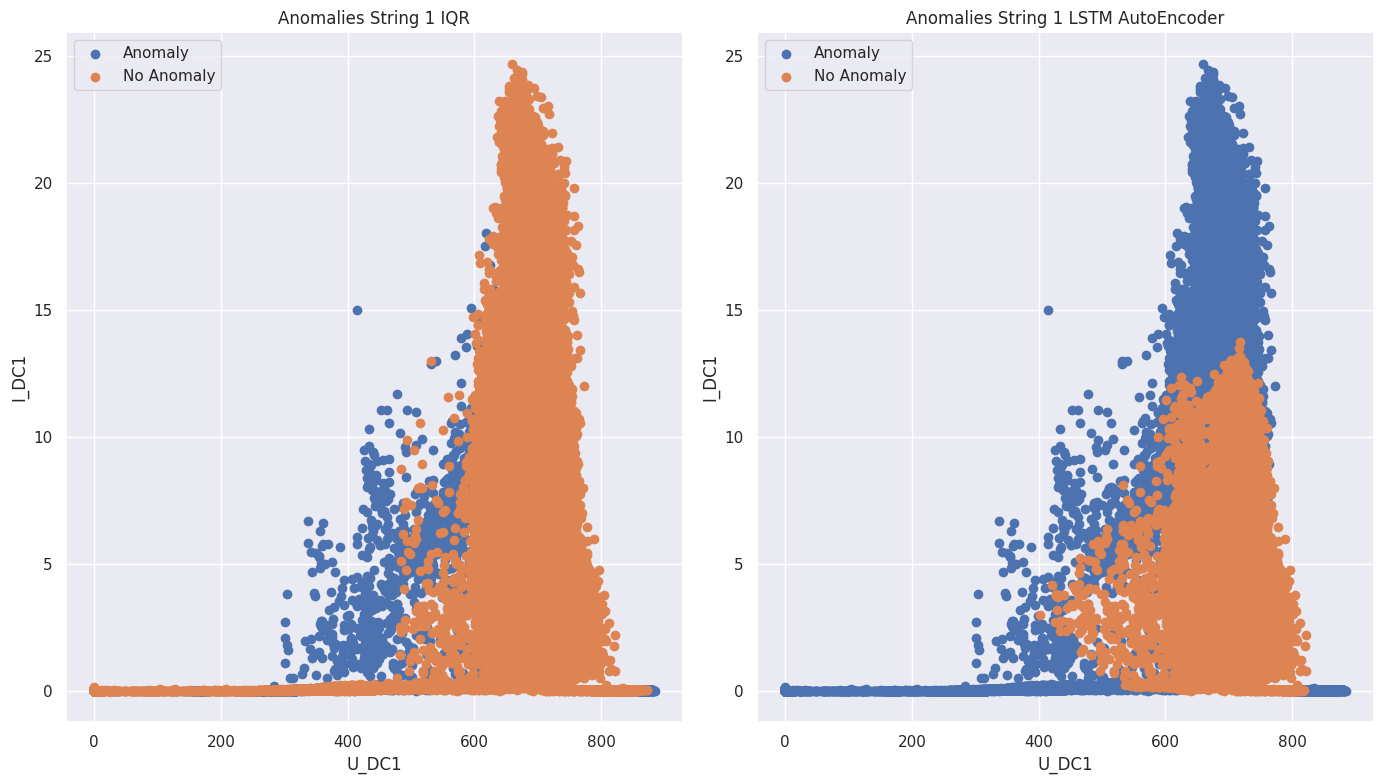

In [ ]:
#STRING1

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_train['U_DC1'], anomaly_iqr_train['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_iqr_train['U_DC1'], no_anomaly_iqr_train['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_ae_train['U_DC1'], anomaly_ae_train['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_ae_train['U_DC1'], no_anomaly_ae_train['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 LSTM AutoEncoder')


# Ajustes de diseño
plt.tight_layout()
plt.show()

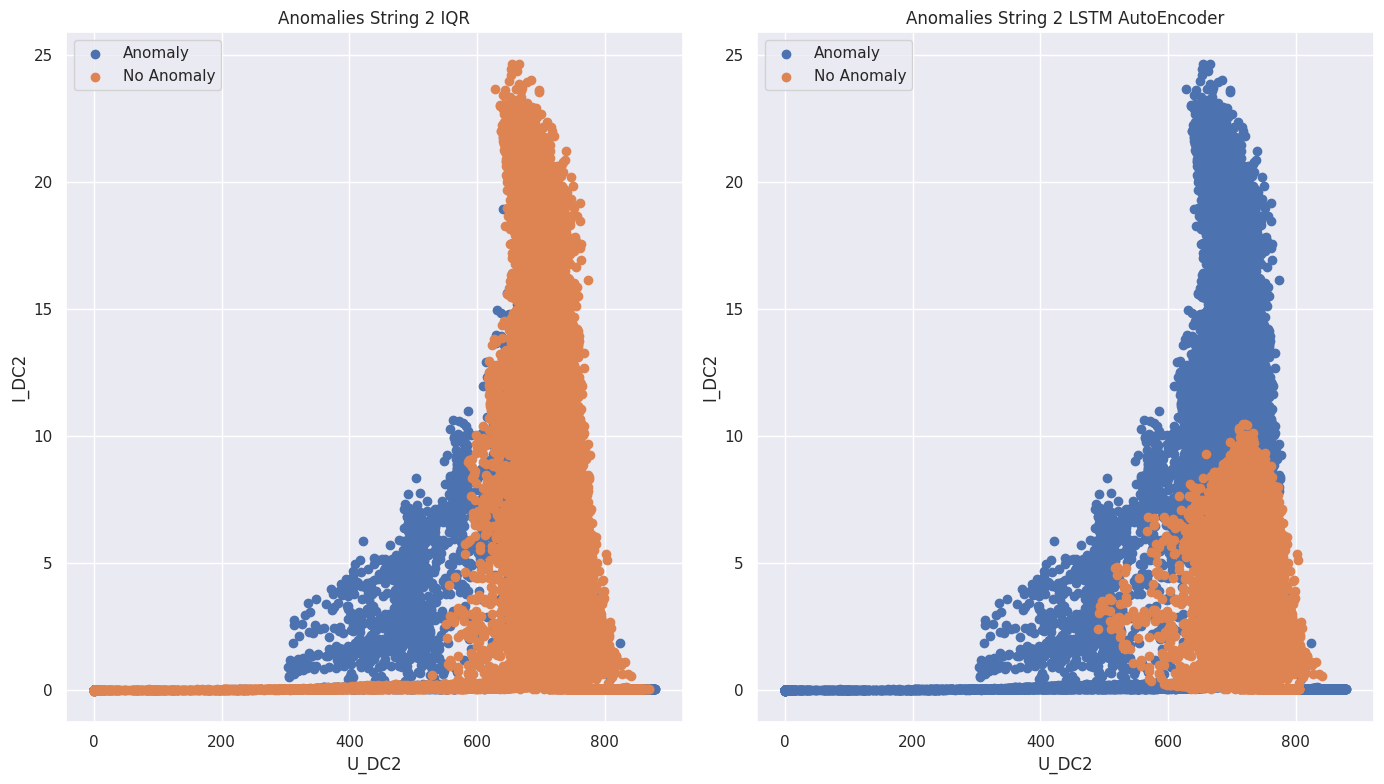

In [ ]:
#STRING2

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_train['U_DC2'], anomaly_iqr_train['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_iqr_train['U_DC2'], no_anomaly_iqr_train['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_ae_train['U_DC2'], anomaly_ae_train['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_ae_train['U_DC2'], no_anomaly_ae_train['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 LSTM AutoEncoder')


# Ajustes de diseño
plt.tight_layout()
plt.show()

#### Datos de Prueba

In [ ]:
x_pred_ae_test = ae_model.predict(x_test_ae_lstm)
x_pred_ae_test = x_pred_ae_test.reshape(x_pred_ae_test.shape[0], x_pred_ae_test.shape[2])
x_pred_ae_test = pd.DataFrame(x_pred_ae_test, columns=rows_ae_test.columns)

1506/1506 [==============================] - 7s 4ms/step


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

scored_test = pd.DataFrame()
x_test_layers = x_test_ae_lstm.reshape(x_test_ae_lstm.shape[0], x_test_ae_lstm.shape[2])
scored_test['Loss_mae'] = np.mean(np.abs(x_pred_ae_test-x_test_layers), axis = 1)
scored_test['Threshold'] = 0.75
scored_test['Anomaly'] = scored_test['Loss_mae'] > scored_test['Threshold']
anomalies_ae_test = np.array(scored_test['Anomaly'])
anomalies_ae_test = anomalies_ae_test.astype(int)
accuracy = accuracy_score(anomalies_ae_test,y_test_ae)
precision = precision_score(anomalies_ae_test,y_test_ae)
f1_score = f1_score(anomalies_ae_test,y_test_ae)
recall = recall_score(anomalies_ae_test,y_test_ae)
print("Precision: "+ str(precision))
print("Accuracy: "+ str(accuracy))
print("F1_Score: "+ str(f1_score))
print("Recall: "+ str(recall))
anomalies_ae_test[anomalies_ae_test==1].shape

Precision: 0.9993840942335822
Accuracy: 0.9439599684398489
F1_Score: 0.9665074145312402
Recall: 0.9357249267144024


(41618,)

Text(0.5, 1.0, 'Confusion Matrix for LSTM Autoencoder - Test Data')

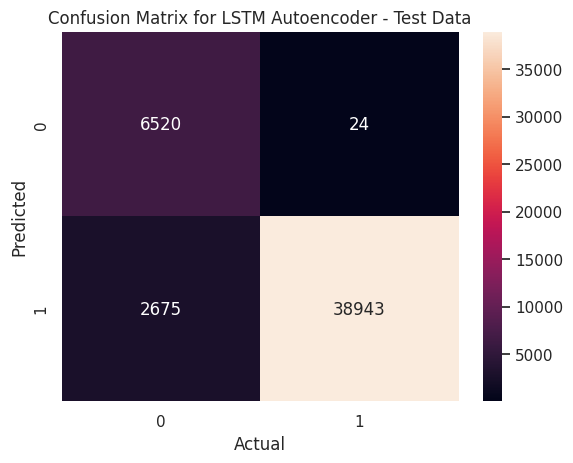

In [ ]:
cm_test = confusion_matrix(anomalies_ae_test,y_test_ae)
sns.heatmap(cm_test,annot=True, fmt='g')
# Set the axis labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix for LSTM Autoencoder - Test Data')

In [ ]:
tp,tn,fn,fp = compute_tp_tn_fn_fp(anomalies_ae_test,y_test_ae)
print("Number of TP: "+str(tp))
print("Number of TN: "+str(tn))
print("Number of FP: "+str(fp))
print("Number of FN: "+str(fn))


specificity_test = specificity(tn,fp)
print('Specificity:'+ str(specificity_test))


Number of TP: 38943
Number of TN: 6520
Number of FP: 2675
Number of FN: 24
Specificity:0.7090810222947254


In [ ]:
df_test_ae['Anomaly'] = anomalies_ae_test

<ipython-input-172-9956cf24a2bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_ae['Anomaly'] = anomalies_ae_test


In [ ]:
count0 = (df_test_ae['Anomaly'] == 0).sum()
count1 = (df_test_ae['Anomaly'] == 1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

6544 41618


In [ ]:
anomaly_ae_test = df_test_ae[df_test_ae['Anomaly'] == 1]
no_anomaly_ae_test = df_test_ae[df_test_ae['Anomaly'] == 0]

In [ ]:
#Coincidencias con modelo estadístico
print(anomaly_iqr_test['Timestamp'].isin(anomaly_ae_test['Timestamp']).sum())

38943


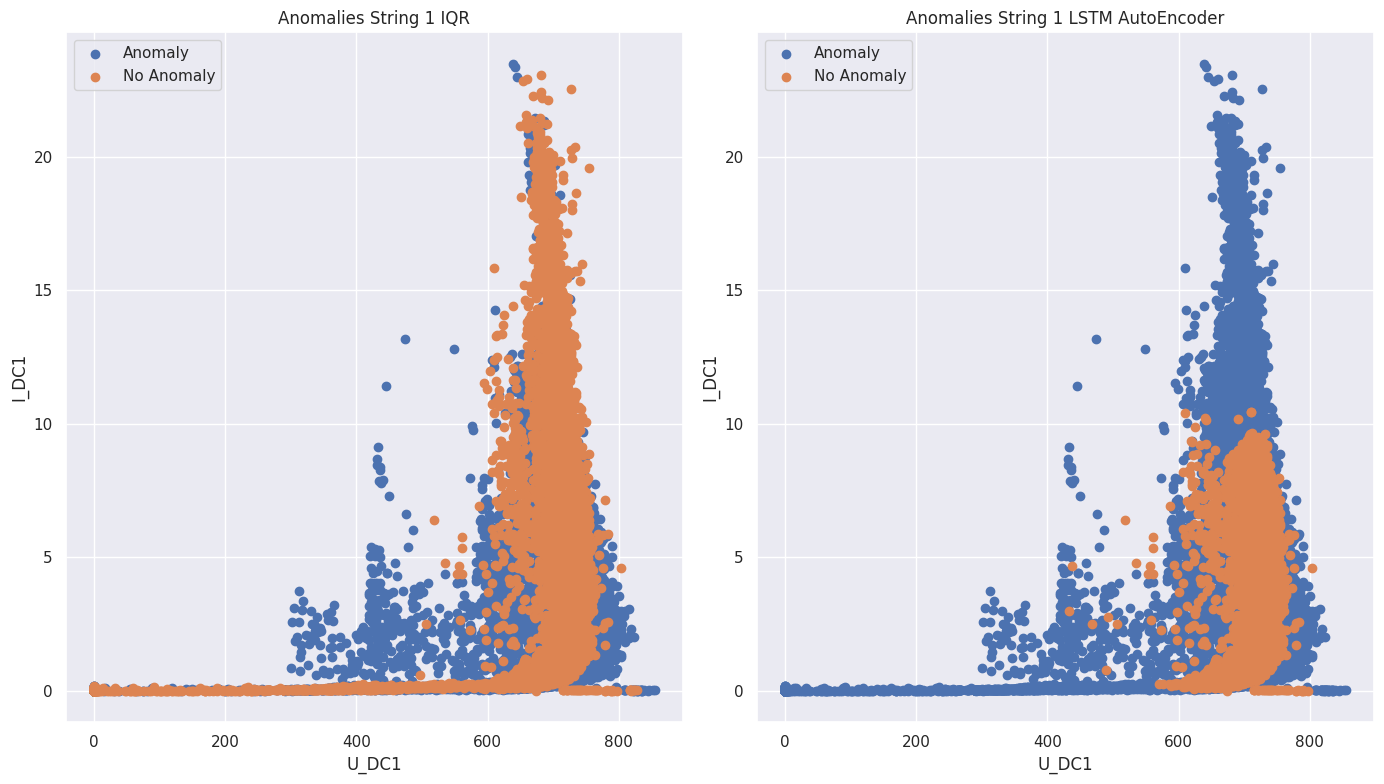

In [ ]:
#STRING1

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_test['U_DC1'], anomaly_iqr_test['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_iqr_test['U_DC1'], no_anomaly_iqr_test['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_ae_test['U_DC1'], anomaly_ae_test['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_ae_test['U_DC1'], no_anomaly_ae_test['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 LSTM AutoEncoder')


# Ajustes de diseño
plt.tight_layout()
plt.show()

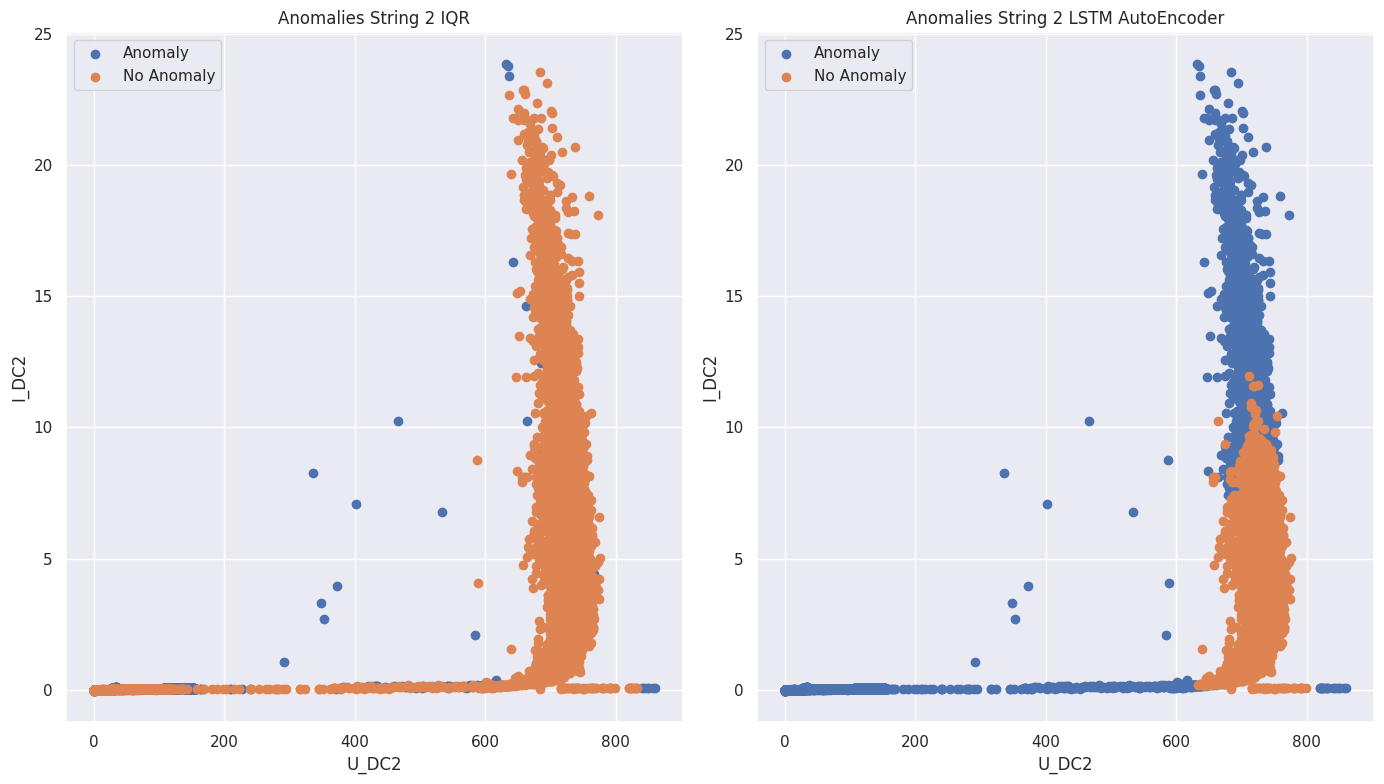

In [ ]:
#STRING2

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_test['U_DC2'], anomaly_iqr_test['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_iqr_test['U_DC2'], no_anomaly_iqr_test['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_ae_test['U_DC2'], anomaly_ae_test['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_ae_test['U_DC2'], no_anomaly_ae_test['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 LSTM AutoEncoder')


# Ajustes de diseño
plt.tight_layout()
plt.show()

### **EXPORTAR DATOS DE MÉTODO: LSTM AUTOENCODER**

In [ ]:
ml_anomaly_df = pd.concat([df_train_ae,df_test_ae])

In [ ]:
ml_anomaly_df

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly
131,2019-08-02 16:25:00,777.010,768.710,2.700,2.607,0
132,2019-08-02 16:30:00,761.130,745.964,3.862,3.748,0
133,2019-08-02 16:35:00,736.754,742.908,3.228,3.192,0
134,2019-08-02 16:40:00,731.928,732.224,2.568,2.484,0
135,2019-08-02 16:45:00,723.546,720.698,1.654,1.640,0
...,...,...,...,...,...,...
203056,2023-06-02 10:10:00,712.860,698.410,15.514,15.758,1
203057,2023-06-02 10:15:00,703.810,696.148,16.136,16.278,1
203058,2023-06-02 10:20:00,702.586,466.782,16.520,10.250,1
203059,2023-06-02 10:25:00,703.080,32.316,15.754,0.080,1


In [ ]:
ml_anomaly_df.to_csv('df_with_anomalies_ae4.csv', sep=';', index=False, encoding='utf-8')